# Proyek Analisis Data: Nama dataset
- Nama: Irvan Achmad Ashari
- Email: irvanachmadashari@gmail.com
- Id Dicoding: maragopan

## Menentukan Pertanyaan Bisnis

**Docs (1)**:
Saya menentukan pertanyaan bisnis menggunakan referensi dari link: https://www.dicoding.com/academies/555/tutorials/31115

- pertanyaan 1: Bagaimana performa penjualan dan revenue yang dihasilkan semua penjual dalam beberapa bulan terakhir?
- pertanyaan 2: Kategori produk apa yang paling banyak dan paling sedikit terjual?
- pertanyaan 3: Bagaimana demografi pelanggan yang kita miliki?
- pertanyaan 4: Kapan terakhir pelanggan melakukan transaksi?
- pertanyaan 5: Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- pertanyaan 6: Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Menyiapkan semua library yang dibutuhkan

**Docs (2)**: Melakukan instalasi streamlit dan streamlit babel

In [3]:
# !pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [4]:
# !pip install streamlit babel

**Docs (3):** Impor semua library yang dibutuhkan dalam proyek ini

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
from google.colab import drive
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from scipy import stats
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Data Wrangling

### Gathering Data

**Docs (4):** Membaca semua dataset dari direktori E-Commerce Public Dataset

**Docs (5):** customers_dataset
1.   customer_id                 : ID pengenal pelanggan (key untuk menghubungkan ke orders_dataset)
2.   customer_unique_id          : ID pengenal pelanggan
3.   customer_zip_code_prefix    : 5 digit pertama kode pos pelanggan
4.   customer_city               : Kota pelanggan
5.   customer_state              : Negara pelanggan



In [6]:
customers_dataset = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IDCAMP/E-Commerce Public Dataset/customers_dataset.csv")
customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


**Docs (6):** geolocation_dataset
1.   geolocation_zip_code_prefix : 5 digit pertama kode pos pelanggan
2.   geolocation_lat             : Garis lintang
3.   geolocation_lng             : Garis bujur
4.   geolocation_city            : Kota
5.   geolocation_state           : Negara

In [7]:
geolocation_dataset = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IDCAMP/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


**Docs (7):** order_items_dataset
1.   order_id                    : ID pesanan
2.   order_item_id               : Nomor urut yang mengidentifikasi jumlah item yang termasuk dalam urutan yang sama
3.   product_id                  : ID pengenal produk
4.   seller_id                   : ID penjual
5.   shipping_limit_date         : Tanggal batas pengiriman penjual
6.   price                       : Harga
7.   freight_value               : Ongkos kirim

In [8]:
order_items_dataset = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IDCAMP/E-Commerce Public Dataset/order_items_dataset.csv")
order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


**Docs (8):** order_payments_dataset
1.   order_id                    : ID pesanan
2.   payment_sequential          : Banyak tipe pembayaran yang digunakan oleh pelanggan
3.   payment_type                : Tipe pembayaran
4.   payment_installments        : Jumlah angsuran yang dipilih oleh pelanggan
5.   payment_value               : Nilai transaksi

In [9]:
order_payments_dataset = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IDCAMP/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


**Docs (9):** order_reviews_dataset
1.   review_id                   : ID ulasan
2.   order_id                    : ID pesanan
3.   review_score                : Skor ulasan
4.   review_comment_title        : Judul komentar ulasan
5.   review_comment_message      : Isi komentar ulasan
6.   review_creation_date        : Waktu pengiriman survei ke pelanggan
7.   review_answer_timestamp     : Waktu jawaban survei dari pelanggan

In [10]:
order_reviews_dataset = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IDCAMP/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


**Docs (10):** orders_dataset
1.   order_id                     : ID pesanan
2.   customer_id                  : ID pengenal pelanggan (key untuk menghubungkan ke customers_dataset)
3.   order_status                 : Status pesanan
4.   order_purchase_timestamp     : Waktu pembelian
5.   order_approved_at            : Waktu pembayaran disetujui
6.   order_delivered_carrier_date : Waktu barang berada di mitra logistik
7.   order_delivered_customer_date: Waktu mitra logistik mengirim barang
8.   order_estimated_delivery_date: Waktu perkiraan barang sampai tujuan

In [11]:
orders_dataset = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IDCAMP/E-Commerce Public Dataset/orders_dataset.csv")
orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


**Docs (11):** product_category_name_translation
1.   product_category_name        : Kategori produk dalam bahasa Portugis
2.   product_category_name_english: Kategori produk dalam bahasa Inggris

In [12]:
product_category_name_translation = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IDCAMP/E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


**Docs (12):** products_dataset
1.   product_id                  : ID pengenal produk
2.   product_category_name       : Kategori produk dalam bahasa Portugis
3.   product_name_length         : Panjang karakter yang diekstraksi dari nama produk
4.   product_description_lenght  : Panjang karakter yang diekstraksi dari deskripsi produk
5.   product_photos_qty          : Jumlah foto yang dipublikasikan
6.   product_weight_g            : Berat produk dalam gram
7.   product_length_cm           : Panjang produk dalam centimeter
8.   product_height_cm           : Tinggi produk dalam centimeter
9.   product_width_cm            : Lebar produk dalam centimeter

In [13]:
products_dataset = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IDCAMP/E-Commerce Public Dataset/products_dataset.csv")
products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


**Docs (13):** sellers_dataset
1.   seller_id                   : ID penjual
2.   seller_zip_code_prefix      : 5 digit pertama kode pos penjual
3.   seller_city                 : Kota penjual
4.   seller_state                : Negara penjual

In [14]:
sellers_dataset = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IDCAMP/E-Commerce Public Dataset/sellers_dataset.csv")
sellers_dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


**Docs (14):** Skema Dataset

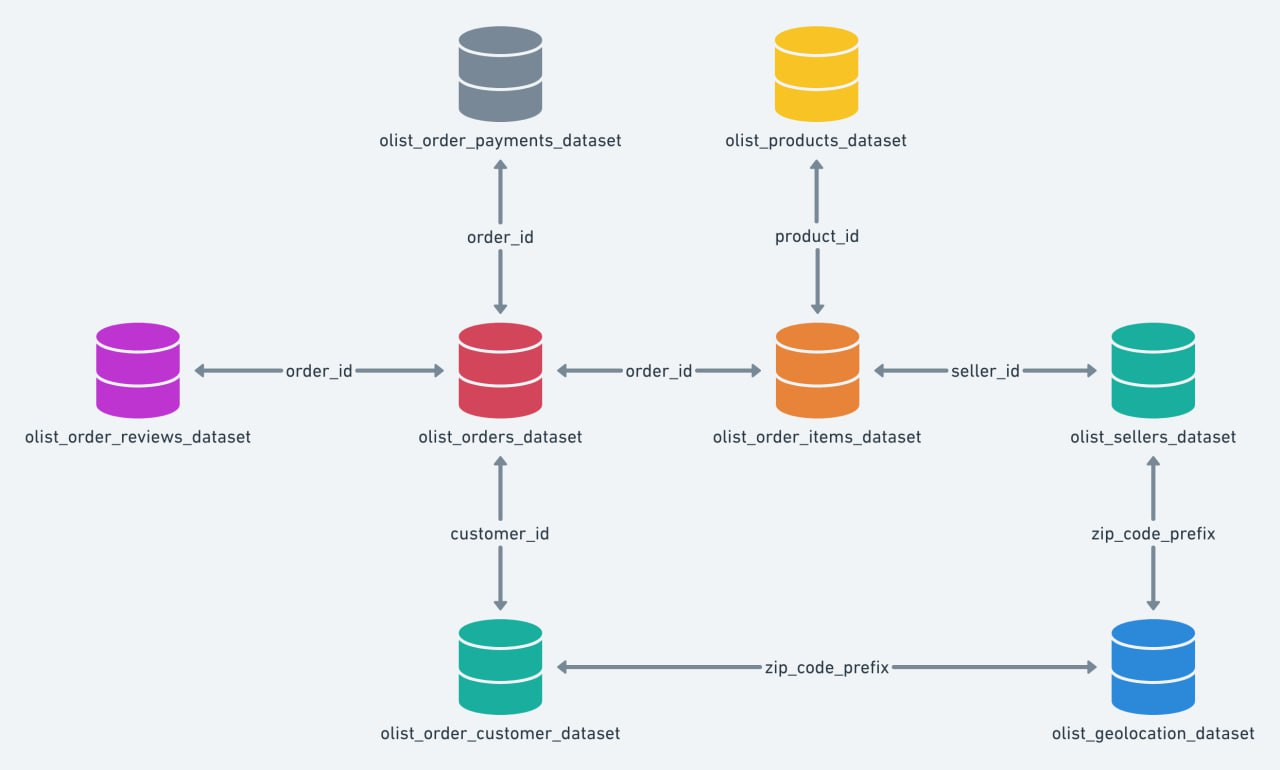

**Docs (15):** Menggabungkan dataset
(new1_dataset  = orders_dataset + order_reviews_dataset)

In [15]:
# Menggabungkan dataset
new1_dataset = pd.merge(
    left=orders_dataset,          # Dikarenakan orders_dataset terhubung dengan banyak dataset lain
    right=order_reviews_dataset,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
new1_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5.0,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


**Docs (16):** Menghapus fitur yang tidak diperlukan, yaitu:
1.   order_approved_at
2.   order_delivered_carrier_date
3.   order_delivered_customer_date
4.   order_estimated_delivery_date
5.   review_id
6.   review_comment_title
7.   review_comment_message
8.   review_answer_timestamp



In [16]:
dropcolumns = ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date", "review_id",
               "review_comment_title", "review_comment_message", "review_answer_timestamp"]
new1_dataset = new1_dataset.drop(dropcolumns, axis=1)
new1_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,review_score,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,4.0,2017-10-11 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,4.0,2018-08-08 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,5.0,2018-08-18 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,5.0,2017-12-03 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,5.0,2018-02-17 00:00:00
...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,5.0,2017-03-22 00:00:00
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,4.0,2018-03-01 00:00:00
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,5.0,2017-09-22 00:00:00
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2.0,2018-01-26 00:00:00


**Docs (17):** Menghitung banyak duplicated values pada new1_dataset dan menghapusnya



In [17]:
print("Banyak duplicated values:", new1_dataset.duplicated().sum())
new1_dataset.drop_duplicates(inplace=True)
new1_dataset[new1_dataset.duplicated()]

Banyak duplicated values: 126


,order_id,customer_id,order_status,order_purchase_timestamp,review_score,review_creation_date


**Docs (18):**

Penelitian ini hanya menggunakan order_status yang delivered dikarenakan penelitian ini bertujuan untuk mencari tahu revenue (penghasilan) yang didapatkan oleh hasil penjualan

In [18]:
# Menghitung banyak transaksi yang tidak delivered
print(len(new1_dataset[new1_dataset["order_status"] != "delivered"]))

# Menghapus record transaksi yang tidak delivered
new1_dataset = new1_dataset[new1_dataset["order_status"] == "delivered"].reset_index(drop=True)
new1_dataset

2983


,order_id,customer_id,order_status,order_purchase_timestamp,review_score,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,4.0,2017-10-11 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,4.0,2018-08-08 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,5.0,2018-08-18 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,5.0,2017-12-03 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,5.0,2018-02-17 00:00:00
...,...,...,...,...,...,...
96878,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,5.0,2017-03-22 00:00:00
96879,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,4.0,2018-03-01 00:00:00
96880,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,5.0,2017-09-22 00:00:00
96881,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2.0,2018-01-26 00:00:00


**Docs (19):**
Menghapus fitur order_status dikarenakan sudah tidak diperlukan lagi

In [19]:
new1_dataset = new1_dataset.drop("order_status", axis=1)
new1_dataset = new1_dataset[["order_id", "customer_id", "review_score", "order_purchase_timestamp", "review_creation_date"]]
new1_dataset

,order_id,customer_id,review_score,order_purchase_timestamp,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,4.0,2017-10-02 10:56:33,2017-10-11 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,4.0,2018-07-24 20:41:37,2018-08-08 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,5.0,2018-08-08 08:38:49,2018-08-18 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,5.0,2017-11-18 19:28:06,2017-12-03 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,5.0,2018-02-13 21:18:39,2018-02-17 00:00:00
...,...,...,...,...,...
96878,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,5.0,2017-03-09 09:54:05,2017-03-22 00:00:00
96879,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,4.0,2018-02-06 12:58:58,2018-03-01 00:00:00
96880,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,5.0,2017-08-27 14:46:43,2017-09-22 00:00:00
96881,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2.0,2018-01-08 21:28:27,2018-01-26 00:00:00


**Docs (20):**
Mengubah tipe data order_purchase_timestamp dan review_creation_date ke datetime

In [20]:
datetime_columns = ["order_purchase_timestamp", "review_creation_date"]

for column in datetime_columns:
  new1_dataset[column] = pd.to_datetime(new1_dataset[column])
new1_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96883 entries, 0 to 96882
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96883 non-null  object        
 1   customer_id               96883 non-null  object        
 2   review_score              96237 non-null  float64       
 3   order_purchase_timestamp  96883 non-null  datetime64[ns]
 4   review_creation_date      96237 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 3.7+ MB


**Docs (21):**
Menghapus informasi jam pada fitur order_purchase_timestamp dan review_creation_date

In [21]:
new1_dataset["order_purchase_timestamp"] = new1_dataset["order_purchase_timestamp"].dt.strftime("%Y-%m-%d")
new1_dataset

,order_id,customer_id,review_score,order_purchase_timestamp,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,4.0,2017-10-02,2017-10-11
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,4.0,2018-07-24,2018-08-08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,5.0,2018-08-08,2018-08-18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,5.0,2017-11-18,2017-12-03
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,5.0,2018-02-13,2018-02-17
...,...,...,...,...,...
96878,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,5.0,2017-03-09,2017-03-22
96879,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,4.0,2018-02-06,2018-03-01
96880,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,5.0,2017-08-27,2017-09-22
96881,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2.0,2018-01-08,2018-01-26


**Docs (22):**
Menghitung waktu pengiriman (delivery_time)

In [22]:
new1_dataset["order_purchase_timestamp"] = pd.to_datetime(new1_dataset["order_purchase_timestamp"])
delivery_time = new1_dataset["review_creation_date"] - new1_dataset["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x:x.total_seconds())
new1_dataset["delivery_time"] = round(delivery_time/86400)
new1_dataset

,order_id,customer_id,review_score,order_purchase_timestamp,review_creation_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,4.0,2017-10-02,2017-10-11,9.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,4.0,2018-07-24,2018-08-08,15.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,5.0,2018-08-08,2018-08-18,10.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,5.0,2017-11-18,2017-12-03,15.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,5.0,2018-02-13,2018-02-17,4.0
...,...,...,...,...,...,...
96878,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,5.0,2017-03-09,2017-03-22,13.0
96879,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,4.0,2018-02-06,2018-03-01,23.0
96880,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,5.0,2017-08-27,2017-09-22,26.0
96881,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2.0,2018-01-08,2018-01-26,18.0


**Docs (23):**
Menampilkan ringkasan parameter statistik

In [23]:
new1_dataset.describe(include="all")

<ipython-input-23-7e7fac952e6a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  new1_dataset.describe(include="all")
<ipython-input-23-7e7fac952e6a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  new1_dataset.describe(include="all")


,order_id,customer_id,review_score,order_purchase_timestamp,review_creation_date,delivery_time
count,96883,96883,96237.000000,96883,96237,96237.000000
unique,96478,96478,NaN,612,627,NaN
top,df56136b8031ecd28e200bb18e6ddb2e,b7770073b02ed1d626a027ce86a4ff82,NaN,2017-11-24 00:00:00,2018-08-28 00:00:00,NaN
freq,3,3,NaN,1154,449,NaN
first,NaN,NaN,NaN,2016-09-15 00:00:00,2016-10-06 00:00:00,NaN
last,NaN,NaN,NaN,2018-08-29 00:00:00,2018-08-31 00:00:00,NaN
mean,NaN,NaN,4.155190,NaN,NaN,12.921122
std,NaN,NaN,1.285226,NaN,NaN,7.364283
min,NaN,NaN,1.000000,NaN,NaN,-77.000000
25%,NaN,NaN,4.000000,NaN,NaN,8.000000


**Docs (24):**
Berdasarkan data tersebut diketahui bahwa terdapat nilai negatif pada delivery_time hal ini kemungkinan disebabkan oleh kesalahan input yang dilakukan user pada fitur review_creation_date, selanjutnya akan dihitung banyak data yang mempunyai delivery_time negatif

In [24]:
# Menghitung delivery_time yang mempunyai nilai negatif
new1_dataset[new1_dataset["delivery_time"] <= 0]

,order_id,customer_id,review_score,order_purchase_timestamp,review_creation_date,delivery_time
31578,ebc94658c583ab37ad4f8e9091c4bef2,92dbb92ac5c6b1822c3aa951d33e61d0,2.0,2018-04-14,2018-03-30,-15.0
42969,82fd1196a459f594fb1d66e667fc74c4,ef9b9b1cb4921466d4190e3116fe248e,4.0,2018-04-10,2018-01-23,-77.0
48602,4bb9c2002502ca416276dc1ff5efb1b3,e0e553d46d86daa33b733b1fd2687731,1.0,2018-06-23,2018-05-18,-36.0
67914,4a62fb19d5fa08fb514619dfcc617b3d,4d1bb9a4d16191ced3d0d1c473ccbc97,3.0,2018-05-09,2018-05-05,-4.0
68030,450c49623c365a4edcf0c5a2c93aa7c9,5a1739996fb7a15067fa38c3a0a1097e,1.0,2017-03-01,2017-02-22,-7.0
87505,96f5be02bc9ffc589f3274500a64a7e2,5396ffb28b2d1cbea8d6ec46201f06ba,1.0,2018-04-23,2018-04-04,-19.0


**Docs (25):**
Memperbaiki nilai review_creation_date

In [25]:
new1_dataset["review_creation_date"][31578]  = "2018-04-30"
new1_dataset["review_creation_date"][42969]  = "2018-04-23"
new1_dataset["review_creation_date"][48602]  = "2018-07-18"
new1_dataset["review_creation_date"][67914]  = "2018-06-05"
new1_dataset["review_creation_date"][68030]  = "2017-03-22"
new1_dataset["review_creation_date"][87505]  = "2018-05-04"
# Menghitung delivery_time yang mempunyai nilai negatif
new1_dataset[new1_dataset["delivery_time"] <= 0]

<ipython-input-25-a287f5ffd4ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new1_dataset["review_creation_date"][31578]  = "2018-04-30"
<ipython-input-25-a287f5ffd4ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new1_dataset["review_creation_date"][42969]  = "2018-04-23"
<ipython-input-25-a287f5ffd4ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new1_dataset["review_creation_date"][48602]  = "2018-07-18"
<ipython-input-2

,order_id,customer_id,review_score,order_purchase_timestamp,review_creation_date,delivery_time
31578,ebc94658c583ab37ad4f8e9091c4bef2,92dbb92ac5c6b1822c3aa951d33e61d0,2.0,2018-04-14,2018-04-30,-15.0
42969,82fd1196a459f594fb1d66e667fc74c4,ef9b9b1cb4921466d4190e3116fe248e,4.0,2018-04-10,2018-04-23,-77.0
48602,4bb9c2002502ca416276dc1ff5efb1b3,e0e553d46d86daa33b733b1fd2687731,1.0,2018-06-23,2018-07-18,-36.0
67914,4a62fb19d5fa08fb514619dfcc617b3d,4d1bb9a4d16191ced3d0d1c473ccbc97,3.0,2018-05-09,2018-06-05,-4.0
68030,450c49623c365a4edcf0c5a2c93aa7c9,5a1739996fb7a15067fa38c3a0a1097e,1.0,2017-03-01,2017-03-22,-7.0
87505,96f5be02bc9ffc589f3274500a64a7e2,5396ffb28b2d1cbea8d6ec46201f06ba,1.0,2018-04-23,2018-05-04,-19.0


**Docs (26):**
Menghitung waktu pengiriman (delivery_time) ulang

In [26]:
new1_dataset["order_purchase_timestamp"] = pd.to_datetime(new1_dataset["order_purchase_timestamp"])
delivery_time = new1_dataset["review_creation_date"] - new1_dataset["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x:x.total_seconds())
new1_dataset["delivery_time"] = round(delivery_time/86400)
new1_dataset.describe(include="all")

<ipython-input-26-a9491e2da431>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  new1_dataset.describe(include="all")
<ipython-input-26-a9491e2da431>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  new1_dataset.describe(include="all")


,order_id,customer_id,review_score,order_purchase_timestamp,review_creation_date,delivery_time
count,96883,96883,96237.000000,96883,96237,96237.000000
unique,96478,96478,NaN,612,627,NaN
top,df56136b8031ecd28e200bb18e6ddb2e,b7770073b02ed1d626a027ce86a4ff82,NaN,2017-11-24 00:00:00,2018-08-28 00:00:00,NaN
freq,3,3,NaN,1154,449,NaN
first,NaN,NaN,NaN,2016-09-15 00:00:00,2016-10-06 00:00:00,NaN
last,NaN,NaN,NaN,2018-08-29 00:00:00,2018-08-31 00:00:00,NaN
mean,NaN,NaN,4.155190,NaN,NaN,12.923938
std,NaN,NaN,1.285226,NaN,NaN,7.355431
min,NaN,NaN,1.000000,NaN,NaN,2.000000
25%,NaN,NaN,4.000000,NaN,NaN,8.000000


**Docs (27):**
Memeriksa missing values dari setiap fitur dalam new1_dataset

In [27]:
new1_dataset.isna().sum()

order_id                      0
customer_id                   0
review_score                646
order_purchase_timestamp      0
review_creation_date        646
delivery_time               646
dtype: int64

**Docs (28):**
Diketahui terdapat missing values pada fitur review_score, review_creation_date, dan delivery_time oleh karena itu selanjutnya mengukur seberapa simetris distribusi data untuk menentukan cara mengatasi missing values menggunakan skewness

In [28]:
print("Nilai skewness fitur review_score :", new1_dataset["review_score"].skew())
print("Nilai skewness fitur delivery_time:", new1_dataset["delivery_time"].skew())

Nilai skewness fitur review_score : -1.4814287074153827
Nilai skewness fitur delivery_time: 1.2542252729493821


**Docs (29):**
Diketahui berdasarkan nilai tersebut disimpulkan bahwa fitur review_score berdistribusi left-skewed distribution, sedangkan fitur delivery_time berdistribusi right-skewed distribution. Kedua fitur tersebut tidak berdistribusi simetris sehingga lebih baik mengisi missing values menggunakan nilai median

In [29]:
new1_dataset["review_score"].fillna(new1_dataset["review_score"].median(), inplace=True)
new1_dataset["delivery_time"].fillna(new1_dataset["delivery_time"].median(), inplace=True)
new1_dataset.isna().sum()

order_id                      0
customer_id                   0
review_score                  0
order_purchase_timestamp      0
review_creation_date        646
delivery_time                 0
dtype: int64

**Docs (30):**
Diketahui masih terdapat missing values pada fitur review_creation_date, untuk mengisi missing values tersebut dihitung menggunakan rumus review_creation_date = order_purchase_timestamp + delivery_time

In [30]:
new1_dataset["review_creation_date"] = new1_dataset["order_purchase_timestamp"] + pd.to_timedelta(new1_dataset["delivery_time"], unit="d")
new1_dataset["review_creation_date"]

0       2017-10-11
1       2018-08-08
2       2018-08-18
3       2017-12-03
4       2018-02-17
           ...    
96878   2017-03-22
96879   2018-03-01
96880   2017-09-22
96881   2018-01-26
96882   2018-03-17
Name: review_creation_date, Length: 96883, dtype: datetime64[ns]

In [31]:
new1_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96883 entries, 0 to 96882
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96883 non-null  object        
 1   customer_id               96883 non-null  object        
 2   review_score              96883 non-null  float64       
 3   order_purchase_timestamp  96883 non-null  datetime64[ns]
 4   review_creation_date      96883 non-null  datetime64[ns]
 5   delivery_time             96883 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 4.4+ MB


**Docs (31):**
Mengetahui apakah terdapat nilai order_id yang sama

In [32]:
new1_dataset[new1_dataset.duplicated("order_id", keep=False)].head(20)

,order_id,customer_id,review_score,order_purchase_timestamp,review_creation_date,delivery_time
391,ac7a92560a9e99f0a0ab4988102f491b,6abf781c5304890987047e9aa239caa8,1.0,2018-03-04,2018-03-25,21.0
392,ac7a92560a9e99f0a0ab4988102f491b,6abf781c5304890987047e9aa239caa8,1.0,2018-03-04,2018-03-23,19.0
538,7845a2492ab1b4f2cf3d56c7b8da1446,386e96046ce0e77e5c9a9a4e818da93c,5.0,2018-01-18,2018-01-24,6.0
539,7845a2492ab1b4f2cf3d56c7b8da1446,386e96046ce0e77e5c9a9a4e818da93c,5.0,2018-01-18,2018-01-27,9.0
649,acbe07f22f29ad7e5a78f30008cc6ec7,b4afeb58ac51bc903c5362286c6a5cfe,5.0,2017-11-18,2017-11-30,12.0
650,acbe07f22f29ad7e5a78f30008cc6ec7,b4afeb58ac51bc903c5362286c6a5cfe,5.0,2017-11-18,2017-11-25,7.0
792,c761a8b74f1e876bc5efc4186f720e27,a8ed087e25b26fb64cbb99033eb243a7,4.0,2017-04-03,2017-04-09,6.0
793,c761a8b74f1e876bc5efc4186f720e27,a8ed087e25b26fb64cbb99033eb243a7,1.0,2017-04-03,2017-04-12,9.0
1066,5e4c365dd3cf7769a88981f408d069d3,15f7712bb12fe27068e5353d14503653,1.0,2017-11-21,2017-12-16,25.0
1067,5e4c365dd3cf7769a88981f408d069d3,15f7712bb12fe27068e5353d14503653,1.0,2017-11-21,2017-12-14,23.0


**Docs (32):**
Diketahui terdapat order_id yang sama pada dataset tersebut, hal tersebut kemungkinan disebabkan oleh pelanggan yang melakukan edit ulasan atau review, oleh karena itu akan disortir berdasarkan review_creation_date dan mengambil records dengan review_creation_date terbaru. Sebelumnya, memisahkan dataset menjadi 2 dataset yaitu dataset yang menunjukkan waktu barang diterima dan dataset yang menunjukkan waktu customer memberikan review

**Docs (33):**
Membuat dataset yang menunjukkan waktu barang diterima dengan fitur:
1.   order_id
2.   customer_id
3.   order_purchase_timestamp
4.   delivery_date (berasal dari fitur review_creation_date terlama)
5.   delivery_time



In [33]:
# Membuat dataset baru order_delivery_date_dataset
order_delivery_date_dataset = pd.concat([new1_dataset["order_id"], new1_dataset["customer_id"], new1_dataset["order_purchase_timestamp"],
                                         new1_dataset["review_creation_date"], new1_dataset["delivery_time"]], axis=1)
order_delivery_date_dataset.columns = ["order_id", "customer_id", "order_purchase_timestamp", "delivery_date", "delivery_time"]

# Mengurutkan dataset berdasarkan order_id dan delivery_date
order_delivery_date_dataset = order_delivery_date_dataset.sort_values(by=["order_id", "delivery_date"]).reset_index(drop=True)

# Menampilkan records yang mempunyai order_id duplikat pada order_delivery_date_dataset
order_delivery_date_dataset[order_delivery_date_dataset.duplicated("order_id", keep=False)].head(20)

,order_id,customer_id,order_purchase_timestamp,delivery_date,delivery_time
83,0035246a40f520710769010f752e7507,4bcf2ad7ccc061c13ff360aae5b7abcd,2017-08-17,2017-08-25,8.0
84,0035246a40f520710769010f752e7507,4bcf2ad7ccc061c13ff360aae5b7abcd,2017-08-17,2017-08-29,12.0
455,013056cfe49763c6f66bda03396c5ee3,d3d38825275e47847abef7e1936b3bcb,2018-02-14,2018-02-22,8.0
456,013056cfe49763c6f66bda03396c5ee3,d3d38825275e47847abef7e1936b3bcb,2018-02-14,2018-03-04,18.0
822,02355020fd0a40a0d56df9f6ff060413,b28f05c74142c8e7c6e07e5336fa63ae,2018-02-28,2018-03-21,21.0
823,02355020fd0a40a0d56df9f6ff060413,b28f05c74142c8e7c6e07e5336fa63ae,2018-02-28,2018-03-29,29.0
974,029863af4b968de1e5d6a82782e662f5,74179773f1f31f3af11c3b3b065115f1,2017-07-06,2017-07-14,8.0
975,029863af4b968de1e5d6a82782e662f5,74179773f1f31f3af11c3b3b065115f1,2017-07-06,2017-07-19,13.0
1079,02e0b68852217f5715fb9cc885829454,12b78d9eacb77edde80d19b9528bcfe9,2017-11-24,2017-12-01,7.0
1080,02e0b68852217f5715fb9cc885829454,12b78d9eacb77edde80d19b9528bcfe9,2017-11-24,2017-12-03,9.0


In [34]:
# Menghapus semua nilai duplikat kecuali pada records yang pertama kali muncul dikarenakan untuk menentukan pertama kali review dikirimkan ke customer (saat product sampai ke customer)
order_delivery_date_dataset = order_delivery_date_dataset.drop_duplicates(subset="order_id", keep="first").reset_index(drop=True)
print(len(order_delivery_date_dataset))
order_delivery_date_dataset

96478


,order_id,customer_id,order_purchase_timestamp,delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13,2017-09-21,8.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26,2017-05-13,17.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14,2018-01-23,9.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08,2018-08-15,7.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04,2017-03-02,26.0
...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23,2018-05-11,18.0
96474,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,2018-07-14,2018-07-24,10.0
96475,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,2017-10-23,2017-10-29,6.0
96476,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,2017-08-14,2017-08-17,3.0


**Docs (34):**
Membuat dataset yang menunjukkan waktu customer memberikan review:
1.   order_id
2.   customer_id
3.   review_score
4.   review_creation_date



In [35]:
# Membuat dataset baru order_review_creation_dataset
order_review_creation_date_dataset = pd.concat([new1_dataset["order_id"], new1_dataset["customer_id"], new1_dataset["review_score"], new1_dataset["review_creation_date"]], axis=1)
order_review_creation_date_dataset

# Mengurutkan dataset berdasarkan order_id dan review_creation_date
order_review_creation_date_dataset = order_review_creation_date_dataset.sort_values(by=["order_id", "review_creation_date"]).reset_index(drop=True)

# Menampilkan records yang mempunyai order_id duplikat pada order_review_creation_date_dataset
order_review_creation_date_dataset[order_review_creation_date_dataset.duplicated("order_id", keep=False)].head(20)

,order_id,customer_id,review_score,review_creation_date
83,0035246a40f520710769010f752e7507,4bcf2ad7ccc061c13ff360aae5b7abcd,5.0,2017-08-25
84,0035246a40f520710769010f752e7507,4bcf2ad7ccc061c13ff360aae5b7abcd,5.0,2017-08-29
455,013056cfe49763c6f66bda03396c5ee3,d3d38825275e47847abef7e1936b3bcb,5.0,2018-02-22
456,013056cfe49763c6f66bda03396c5ee3,d3d38825275e47847abef7e1936b3bcb,4.0,2018-03-04
822,02355020fd0a40a0d56df9f6ff060413,b28f05c74142c8e7c6e07e5336fa63ae,3.0,2018-03-21
823,02355020fd0a40a0d56df9f6ff060413,b28f05c74142c8e7c6e07e5336fa63ae,1.0,2018-03-29
974,029863af4b968de1e5d6a82782e662f5,74179773f1f31f3af11c3b3b065115f1,5.0,2017-07-14
975,029863af4b968de1e5d6a82782e662f5,74179773f1f31f3af11c3b3b065115f1,4.0,2017-07-19
1079,02e0b68852217f5715fb9cc885829454,12b78d9eacb77edde80d19b9528bcfe9,4.0,2017-12-01
1080,02e0b68852217f5715fb9cc885829454,12b78d9eacb77edde80d19b9528bcfe9,4.0,2017-12-03


In [36]:
# Menghapus semua nilai duplikat kecuali pada records yang terakhir kali muncul dikarenakan untuk menentukan terakhir kali customer melakukan review (mengubah review)
order_review_creation_date_dataset = order_review_creation_date_dataset.drop_duplicates(subset="order_id", keep="last")
print(len(order_review_creation_date_dataset))
order_review_creation_date_dataset

96478


,order_id,customer_id,review_score,review_creation_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,5.0,2017-09-21
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,4.0,2017-05-13
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,5.0,2018-01-23
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,4.0,2018-08-15
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,5.0,2017-03-02
...,...,...,...,...
96878,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,5.0,2018-05-11
96879,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,5.0,2018-07-24
96880,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,5.0,2017-10-29
96881,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,5.0,2017-08-17


**Docs (35):**
Menggabungkan order_delivery_date_dataset dan order_review_creation_date_dataset



In [37]:
# Menggabungkan dataset
mergedataset = pd.merge(
    left=order_delivery_date_dataset,
    right=order_review_creation_date_dataset,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
mergedataset

,order_id,customer_id_x,order_purchase_timestamp,delivery_date,delivery_time,customer_id_y,review_score,review_creation_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13,2017-09-21,8.0,3ce436f183e68e07877b285a838db11a,5.0,2017-09-21
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26,2017-05-13,17.0,f6dd3ec061db4e3987629fe6b26e5cce,4.0,2017-05-13
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14,2018-01-23,9.0,6489ae5e4333f3693df5ad4372dab6d3,5.0,2018-01-23
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08,2018-08-15,7.0,d4eb9395c8c0431ee92fce09860c5a06,4.0,2018-08-15
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04,2017-03-02,26.0,58dbd0b2d70206bf40e62cd34e84d795,5.0,2017-03-02
...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23,2018-05-11,18.0,b51593916b4b8e0d6f66f2ae24f2673d,5.0,2018-05-11
96474,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,2018-07-14,2018-07-24,10.0,84c5d4fbaf120aae381fad077416eaa0,5.0,2018-07-24
96475,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,2017-10-23,2017-10-29,6.0,29309aa813182aaddc9b259e31b870e6,5.0,2017-10-29
96476,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,2017-08-14,2017-08-17,3.0,b5e6afd5a41800fdf401e0272ca74655,5.0,2017-08-17


**Docs (36):**
Menghapus dan mengubah nama fitur mergedataset

In [38]:
mergedataset = mergedataset.drop("customer_id_y", axis=1)
mergedataset.columns = ["order_id", "customer_id", "order_purchase_timestamp", "delivery_date", "delivery_time",
                        "review_score", "review_creation_date"]
new1_dataset = mergedataset
new1_dataset

,order_id,customer_id,order_purchase_timestamp,delivery_date,delivery_time,review_score,review_creation_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13,2017-09-21,8.0,5.0,2017-09-21
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26,2017-05-13,17.0,4.0,2017-05-13
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14,2018-01-23,9.0,5.0,2018-01-23
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08,2018-08-15,7.0,4.0,2018-08-15
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04,2017-03-02,26.0,5.0,2017-03-02
...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23,2018-05-11,18.0,5.0,2018-05-11
96474,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,2018-07-14,2018-07-24,10.0,5.0,2018-07-24
96475,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,2017-10-23,2017-10-29,6.0,5.0,2017-10-29
96476,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,2017-08-14,2017-08-17,3.0,5.0,2017-08-17


**Docs (37):**
Eksplorasi data order_payments_dataset

In [39]:
# Mengurutkan dataset berdasarkan order_id
order_payments_dataset = order_payments_dataset.sort_values(by="order_id").reset_index(drop=True)
order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04
...,...,...,...,...,...
103881,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40
103882,fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53
103883,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85
103884,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71


**Docs (38):** Mengetahui missing values dan duplicated values dari order_payments_dataset

In [40]:
# Mengetahui missing values dari order_payments_dataset
print(order_payments_dataset.isna().sum())
# Mengetahui duplicated values dari order_payments_dataset
print(order_payments_dataset.duplicated().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
0


**Docs (39):**
Mengetahui tipe pembayaran yang sering dilakukan oleh pelanggan

In [41]:
order_payments_dataset.groupby(by="payment_type").order_id.count().sort_values(ascending=False).reset_index()

,payment_type,order_id
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


**Docs (40):**
Mengubah fitur payment_type menggunakan teknik One-Hot-Encoding

In [42]:
# Menggunakan teknik One-Hot-Encoding
encoded_payment_type = pd.get_dummies(order_payments_dataset["payment_type"])
# Menggabungkan dataframe order_payments_dataset dan dataframe hasil One Hot Encoding
order_payments_dataset = pd.concat([order_payments_dataset , encoded_payment_type], axis=1)
order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19,0,1,0,0,0
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83,0,1,0,0,0
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87,0,1,0,0,0
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78,0,1,0,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
103881,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40,1,0,0,0,0
103882,fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53,1,0,0,0,0
103883,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85,0,1,0,0,0
103884,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71,0,1,0,0,0


**Docs (41):**
Mengetahui banyak angsuran yang dipilih olen pelanggan

In [43]:
order_payments_dataset.groupby(by="payment_type").agg({
    "payment_installments": ["min", "max", "mean"]
})

payment_installments              
                              min max      mean
payment_type                                   
boleto                          1   1  1.000000
credit_card                     0  24  3.507155
debit_card                      1   1  1.000000
not_defined                     1   1  1.000000
voucher                         1   1  1.000000

**Docs (42):**
Berdasarkan hasil di atas diketahui bahwa pelanggan melakukan angsuran ketika melakukan pembayaran menggunakan credit_card. Pelanggan melakukan angsuran paling banyak sebanyak 24x dan rata-rata pelanggan melakukan angsuran sebanyak 3x-4x

**Docs (43):**
Menghapus fitur payment_type dan payment_installments

In [44]:
# Menghapus fitur payment_type dan payment_installments
order_payments_dataset2 = order_payments_dataset.copy()
order_payments_dataset2.drop(["payment_type", "payment_installments"], axis=1, inplace=True)
order_payments_dataset2

,order_id,payment_sequential,payment_value,boleto,credit_card,debit_card,not_defined,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,1,72.19,0,1,0,0,0
1,00018f77f2f0320c557190d7a144bdd3,1,259.83,0,1,0,0,0
2,000229ec398224ef6ca0657da4fc703e,1,216.87,0,1,0,0,0
3,00024acbcdf0a6daa1e931b038114c75,1,25.78,0,1,0,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04,0,1,0,0,0
...,...,...,...,...,...,...,...,...
103881,fffc94f6ce00a00581880bf54a75a037,1,343.40,1,0,0,0,0
103882,fffcd46ef2263f404302a634eb57f7eb,1,386.53,1,0,0,0,0
103883,fffce4705a9662cd70adb13d4a31832d,1,116.85,0,1,0,0,0
103884,fffe18544ffabc95dfada21779c9644f,1,64.71,0,1,0,0,0


**Docs (44):**
Mengelompokkan data yang mempunyai order_id yang sama dalam 1 records

In [45]:
order_payments_dataset2 = order_payments_dataset2.groupby("order_id").agg({
    "payment_sequential": "max",
    "payment_value": "sum",
    "boleto": "sum",
    "credit_card": "sum",
    "debit_card": "sum",
    "not_defined": "sum",
    "voucher": "sum"
}).reset_index()
order_payments_dataset2.columns = ["order_id", "many_payments", "payment_value", "boleto", "credit_card", "debit_card", "not_defined", "voucher"]
order_payments_dataset2

,order_id,many_payments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,1,72.19,0,1,0,0,0
1,00018f77f2f0320c557190d7a144bdd3,1,259.83,0,1,0,0,0
2,000229ec398224ef6ca0657da4fc703e,1,216.87,0,1,0,0,0
3,00024acbcdf0a6daa1e931b038114c75,1,25.78,0,1,0,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04,0,1,0,0,0
...,...,...,...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,1,343.40,1,0,0,0,0
99436,fffcd46ef2263f404302a634eb57f7eb,1,386.53,1,0,0,0,0
99437,fffce4705a9662cd70adb13d4a31832d,1,116.85,0,1,0,0,0
99438,fffe18544ffabc95dfada21779c9644f,1,64.71,0,1,0,0,0


**Docs (45):**
Mengecek apakah masih terdapat order_id yang sama dalam dataset

In [46]:
order_payments_dataset2[order_payments_dataset2.duplicated("order_id", keep=False)].head(20)

,order_id,many_payments,payment_value,boleto,credit_card,debit_card,not_defined,voucher


**Docs (46):**
Menggabungkan dataset
(new2_dataset  = new1_dataset + order_payments_dataset2)

In [47]:
new2_dataset = pd.merge(
    left=new1_dataset,
    right=order_payments_dataset2,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
new2_dataset

,order_id,customer_id,order_purchase_timestamp,delivery_date,delivery_time,review_score,review_creation_date,many_payments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13,2017-09-21,8.0,5.0,2017-09-21,1.0,72.19,0.0,1.0,0.0,0.0,0.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26,2017-05-13,17.0,4.0,2017-05-13,1.0,259.83,0.0,1.0,0.0,0.0,0.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14,2018-01-23,9.0,5.0,2018-01-23,1.0,216.87,0.0,1.0,0.0,0.0,0.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08,2018-08-15,7.0,4.0,2018-08-15,1.0,25.78,0.0,1.0,0.0,0.0,0.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04,2017-03-02,26.0,5.0,2017-03-02,1.0,218.04,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23,2018-05-11,18.0,5.0,2018-05-11,1.0,343.40,1.0,0.0,0.0,0.0,0.0
96474,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,2018-07-14,2018-07-24,10.0,5.0,2018-07-24,1.0,386.53,1.0,0.0,0.0,0.0,0.0
96475,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,2017-10-23,2017-10-29,6.0,5.0,2017-10-29,1.0,116.85,0.0,1.0,0.0,0.0,0.0
96476,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,2017-08-14,2017-08-17,3.0,5.0,2017-08-17,1.0,64.71,0.0,1.0,0.0,0.0,0.0


**Docs (47):**
Mengetahui missing values dan duplicated values dari new2_dataset

In [48]:
# Mengetahui missing values dari new2_dataset
print(new2_dataset.isna().sum())
# Mengetahui duplicated values dari new2_dataset
print(new2_dataset.duplicated().sum())

order_id                    0
customer_id                 0
order_purchase_timestamp    0
delivery_date               0
delivery_time               0
review_score                0
review_creation_date        0
many_payments               1
payment_value               1
boleto                      1
credit_card                 1
debit_card                  1
not_defined                 1
voucher                     1
dtype: int64
0


**Docs (48):**
Menampilkan data yang mengandung missing values

In [49]:
new2_dataset[new2_dataset["many_payments"].isna()]

,order_id,customer_id,order_purchase_timestamp,delivery_date,delivery_time,review_score,review_creation_date,many_payments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
72234,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,2016-09-15,2016-10-06,21.0,1.0,2016-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Docs (49):**
Mengisi missing values tersebut
1.   Mengisi nilai fitur many_payments dengan nilai paling banyak muncul (modus)
2.   Mengisi nilai boleto, credit_card, debit_card, not_defined, dan voucher dengan modus dari fitur payment_type pada order_payments_dataset
3.   Mengisi nilai payment_value dengan menyesuaikan nilai pada order_items_dataset



In [50]:
# 1.
# Mengetahui modus dari fitur many_payments pada new2_dataset
print(new2_dataset["many_payments"].mode()[0])
# Mengisi nilai fitur many_payments dengan nilai paling banyak muncul (modus)
new2_dataset.loc[72234, "many_payments"] = new2_dataset["many_payments"].mode()[0]
new2_dataset.iloc[72234:72235]

1.0


,order_id,customer_id,order_purchase_timestamp,delivery_date,delivery_time,review_score,review_creation_date,many_payments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
72234,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,2016-09-15,2016-10-06,21.0,1.0,2016-10-06,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# 2.
# Mengetahui modus dari fitur payment_type pada order_payments_dataset
print(order_payments_dataset["payment_type"].mode()[0])
# Mengisi nilai fitur boleto, credit_card. debit_card, not_defined, dan voucher dengan modus
new2_dataset.loc[72234, "boleto"] = 0
new2_dataset.loc[72234, "credit_card"] = 1
new2_dataset.loc[72234, "debit_card"] = 0
new2_dataset.loc[72234, "not_defined"] = 0
new2_dataset.loc[72234, "voucher"] = 0
new2_dataset.iloc[72234:72235]

credit_card


,order_id,customer_id,order_purchase_timestamp,delivery_date,delivery_time,review_score,review_creation_date,many_payments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
72234,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,2016-09-15,2016-10-06,21.0,1.0,2016-10-06,1.0,NaN,0.0,1.0,0.0,0.0,0.0


In [52]:
# 3.
# Mengecek order_id bfbd0f9bdef84302105ad712db648a6c pada order_items_dataset
order_items_dataset[order_items_dataset["order_id"] == "bfbd0f9bdef84302105ad712db648a6c"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84390,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84391,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83


In [53]:
# Berdasarkan nilai di atas dapat dihitung nilai payment_value untuk mengisi missing values
temp = order_items_dataset[order_items_dataset["order_id"] == "bfbd0f9bdef84302105ad712db648a6c"].copy().reset_index(drop=True)
temp = temp.groupby("order_id").agg({
    "price": "sum",
    "freight_value": "sum",
}).reset_index()
temppayment = temp["price"] + temp["freight_value"]
new2_dataset.loc[72234, "payment_value"] = temppayment[0]
new2_dataset.iloc[72234:72235]

,order_id,customer_id,order_purchase_timestamp,delivery_date,delivery_time,review_score,review_creation_date,many_payments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
72234,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,2016-09-15,2016-10-06,21.0,1.0,2016-10-06,1.0,143.46,0.0,1.0,0.0,0.0,0.0


**Docs (50):**
Mengetahui missing values dan duplicated values dari new2_dataset

In [54]:
# Mengetahui missing values dari new2_dataset
print(new2_dataset.isna().sum())
# Mengetahui duplicated values dari new2_dataset
print(new2_dataset.duplicated().sum())

order_id                    0
customer_id                 0
order_purchase_timestamp    0
delivery_date               0
delivery_time               0
review_score                0
review_creation_date        0
many_payments               0
payment_value               0
boleto                      0
credit_card                 0
debit_card                  0
not_defined                 0
voucher                     0
dtype: int64
0


**Docs (51):**
Eksplorasi data order_items_dataset

In [55]:
# Menampilkan order_items_dataset
order_items_dataset2 = order_items_dataset.copy()
order_items_dataset2

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


**Docs (52):**
Menghapus fitur shipping_limit_date karena tidak diperlukan untuk tujuan analisis

In [56]:
order_items_dataset2 = order_items_dataset2.drop("shipping_limit_date", axis=1)
order_items_dataset2

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


**Docs (53):**
Mengecek apakah terdapat order_id yang sama

In [57]:
order_items_dataset2[order_items_dataset2.duplicated("order_id", keep=False)].head(20)

,order_id,order_item_id,product_id,seller_id,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33,15.10
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33,15.10
42,001ab0a7578dd66cd4b0a71f5b6e1e41,1,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,24.89,17.63
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,24.89,17.63
48,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,18.99,7.78
49,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,18.99,7.78


**Docs (54):**
Mengecek apakah terdapat product_id yang berbeda dalam order_id yang sama

In [58]:
different_products = order_items_dataset2.groupby("order_id")["product_id"].nunique()
orders_with_different_products = different_products[different_products > 1]
orders_with_different_products = order_items_dataset2[order_items_dataset2["order_id"].isin(orders_with_different_products.index)]
orders_with_different_products = orders_with_different_products[["order_id", "order_item_id", "product_id"]]
orders_with_different_products

,order_id,order_item_id,product_id
80,002f98c0f7efd42638ed6100ca699b42,1,d41dc2f2979f52d75d78714b378d4068
81,002f98c0f7efd42638ed6100ca699b42,2,880be32f4db1d9f6e2bec38fb6ac23ab
91,00337fe25a3780b3424d9ad7c5a4b35e,1,1f9799a175f50c9fa725984775cac5c5
92,00337fe25a3780b3424d9ad7c5a4b35e,2,13944d17b257432717fd260e69853140
151,005d9a5423d47281ac463a968b3936fb,1,fb7a100ec8c7b34f60cec22b1a9a10e0
...,...,...,...
112536,ffb9a9cd00c74c11c24aa30b3d78e03b,4,3321ad579f19476d0d668f726f8dffec
112547,ffc16cecff8dc037f60458f28d1c1ba5,1,241e398aacc909372622952b2ec6f954
112548,ffc16cecff8dc037f60458f28d1c1ba5,2,7c1043bb5837db0c6bc1953419a18628
112569,ffd543c2b60842e148a86870dc60e212,1,3ce943997ff85cad84ec6770b35d6bcd


**Docs (55):**
Mengecek apakah terdapat seller_id yang berbeda dalam order_id yang sama

In [59]:
different_sellers = order_items_dataset.groupby("order_id")['seller_id'].nunique()
orders_with_different_sellers = different_sellers[different_sellers > 1]
orders_with_different_sellers = order_items_dataset2[order_items_dataset2["order_id"].isin(orders_with_different_sellers.index)]
orders_with_different_sellers = orders_with_different_sellers[["order_id", "seller_id"]]
orders_with_different_sellers

,order_id,seller_id
80,002f98c0f7efd42638ed6100ca699b42,7299e27ed73d2ad986de7f7c77d919fa
81,002f98c0f7efd42638ed6100ca699b42,fa40cc5b934574b62717c68f3d678b6d
296,00bcee890eba57a9767c7b5ca12d3a1b,3bb548e3cb7f70f28e3f11ee9dce0e59
297,00bcee890eba57a9767c7b5ca12d3a1b,9c0e69c7bf2619675bbadf47b43f655a
298,00bcee890eba57a9767c7b5ca12d3a1b,3bb548e3cb7f70f28e3f11ee9dce0e59
...,...,...
112317,ff2a353ee8dfd97ba95c73cca4ed2636,855668e0971d4dfd7bef1b6a4133b41b
112318,ff2a353ee8dfd97ba95c73cca4ed2636,7a67c85e85bb2ce8582c35f2203ad736
112530,ffb8f7de8940249a3221252818937ecb,9f50216bfd01913736a55a11b55ea842
112531,ffb8f7de8940249a3221252818937ecb,c9c7905cffc4ef9ff9f113554423e671


**Docs (56):**
Membuat dataframe order_id pada barang yang telah terkirim (delivered)

In [60]:
order_id_delivered = pd.DataFrame(order_delivery_date_dataset["order_id"].copy())
order_id_delivered

,order_id
0,00010242fe8c5a6d1ba2dd792cb16214
1,00018f77f2f0320c557190d7a144bdd3
2,000229ec398224ef6ca0657da4fc703e
3,00024acbcdf0a6daa1e931b038114c75
4,00042b26cf59d7ce69dfabb4e55b4fd9
...,...
96473,fffc94f6ce00a00581880bf54a75a037
96474,fffcd46ef2263f404302a634eb57f7eb
96475,fffce4705a9662cd70adb13d4a31832d
96476,fffe18544ffabc95dfada21779c9644f


**Docs (57):**
Memperbarui order_items_dataset2 dengan hanya memilih order_id yang berstatus delivered

In [61]:
order_items_dataset3 = pd.merge(
    left=order_id_delivered,
    right=order_items_dataset2,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_dataset3

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...,...
110192,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
110193,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
110194,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
110195,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


**Docs (58):**
Mencari produk terlaris dan tidak

In [62]:
pd.DataFrame(order_items_dataset3["product_id"].value_counts())

,product_id
aca2eb7d00ea1a7b8ebd4e68314663af,520
422879e10f46682990de24d770e7f83d,484
99a4788cb24856965c36a24e339b6058,477
389d119b48cf3043d311335e499d9c6b,390
368c6c730842d78016ad823897a372db,388
...,...
05649d71cdf7d7ec2bbd7a717179de0f,1
69d95947a8a85a44375af7c667a5d61a,1
20cfa43a881c16cdedaaab83e139d302,1
f7f7a305e9312614a635f453cf6be7a8,1


**Docs (59):**
Mencari penjual yang paling banyak menjual produk dan tidak

In [63]:
pd.DataFrame(order_items_dataset3["seller_id"].value_counts())

,seller_id
6560211a19b47992c3666cc44a7e94c0,1996
4a3ca9315b744ce9f8e9374361493884,1949
1f50f920176fa81dab994f9023523100,1926
cc419e0650a3c5ba77189a1882b7556a,1719
da8622b14eb17ae2831f4ac5b9dab84a,1548
...,...
723a46b89fd5c3ed78ccdf039e33ac63,1
a99504ac23ed125aaf5302af6cc30af9,1
19484c79cef6c062cb177aa4ef2fcc3c,1
7cb946b1ad19faebe28c3e86c2794ec3,1


**Docs (60):**
Mencari produk yang menghasilkan pendapatan terbanyak

In [64]:
# Menghapus fitur order_id, order_item_id, seller_id dikarenakan tidak diperlukan untuk tujuan analisis
dropcolumns = ["order_id", "order_item_id", "seller_id"]
order_items_dataset4 = order_items_dataset3.drop(dropcolumns, axis=1)
order_items_dataset4 = order_items_dataset4.groupby("product_id").agg({
    "price": "sum",
    "freight_value": "sum",
}).reset_index()
order_items_dataset4.sort_values(by="price", ascending=False)

,product_id,price,freight_value
23546,bb50f2e236e5eea0100680137654686c,63560.00,3698.03
13749,6cdd53843498f92890544667809f1595,53652.30,4281.43
26997,d6160fb7873f184099d9bc95e30376af,45949.35,1364.83
26436,d1c427060a0f73f6b889a5c7c61f2ac4,45620.56,13336.75
19290,99a4788cb24856965c36a24e339b6058,42049.66,7857.84
...,...,...,...
5953,2e8316b31db34314f393806fd7b6e185,2.99,11.85
13154,680cc8535be7cc69544238c1d6a83fe8,2.90,8.72
17371,8a3254bee785a526d548a81a9bc3c9be,2.55,58.76
6250,310dc32058903b6416c71faff132df9e,2.29,7.78


**Docs (61):**
Mencari penjual dengan pendapatan terbanyak

In [65]:
# Menghapus fitur order_id, order_item_id, product_id dikarenakan tidak diperlukan untuk tujuan analisis
dropcolumns = ["order_id", "order_item_id", "product_id"]
order_items_dataset5 = order_items_dataset3.drop(dropcolumns, axis=1)
order_items_dataset5 = order_items_dataset5.groupby("seller_id").agg({
    "price": "sum",
    "freight_value": "sum",
}).reset_index()
order_items_dataset5.sort_values(by="price", ascending=False)

,seller_id,price,freight_value
834,4869f7a5dfa277a7dca6462dcf3b52b2,226987.93,20019.13
982,53243585a1d6dc2643021fd1853d8905,217940.44,12856.58
858,4a3ca9315b744ce9f8e9374361493884,196882.12,34338.31
2903,fa1c13f2614d7b5c4749cbc52fecda94,190917.14,9916.36
1480,7c67e1448b00f6e969d365cea6b010ab,186570.05,51236.64
...,...,...,...
846,4965a7002cca77301c82d3f91b82e1a9,8.49,7.87
2007,ad14615bdd492b01b0d97922e87cb87f,8.25,10.96
1319,702835e4b785b67a084280efca355756,7.60,10.96
363,1fa2d3def6adfa70e58c276bb64fe5bb,6.90,9.00


**Docs (62):**
Mengelompokkan data yang mempunyai order_id yang sama dalam 1 records

In [66]:
#Menghapus fitur yang sudah tidak diperlukan dikarenakan 1 order_id dapat memiliki product_id dan seller_id lebih dari satu
dropcolumns = ["product_id", "seller_id"]
order_items_dataset3 = order_items_dataset3.drop(dropcolumns, axis=1)
order_items_dataset3 = order_items_dataset3.groupby("order_id").agg({
    "order_item_id": "max",
    "price": "sum",
    "freight_value": "sum"
}).reset_index()
order_items_dataset3

,order_id,order_item_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14
...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41
96474,fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53
96475,fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95
96476,fffe18544ffabc95dfada21779c9644f,1,55.99,8.72


**Docs (63):**
Menggabungkan dataset
(new3_dataset  = new2_dataset + order_items_dataset3)

In [67]:
new3_dataset = pd.merge(
    left=new2_dataset,
    right=order_items_dataset3,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
new3_dataset

,order_id,customer_id,order_purchase_timestamp,delivery_date,delivery_time,review_score,review_creation_date,many_payments,payment_value,boleto,credit_card,debit_card,not_defined,voucher,order_item_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13,2017-09-21,8.0,5.0,2017-09-21,1.0,72.19,0.0,1.0,0.0,0.0,0.0,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26,2017-05-13,17.0,4.0,2017-05-13,1.0,259.83,0.0,1.0,0.0,0.0,0.0,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14,2018-01-23,9.0,5.0,2018-01-23,1.0,216.87,0.0,1.0,0.0,0.0,0.0,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08,2018-08-15,7.0,4.0,2018-08-15,1.0,25.78,0.0,1.0,0.0,0.0,0.0,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04,2017-03-02,26.0,5.0,2017-03-02,1.0,218.04,0.0,1.0,0.0,0.0,0.0,1,199.90,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23,2018-05-11,18.0,5.0,2018-05-11,1.0,343.40,1.0,0.0,0.0,0.0,0.0,1,299.99,43.41
96474,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,2018-07-14,2018-07-24,10.0,5.0,2018-07-24,1.0,386.53,1.0,0.0,0.0,0.0,0.0,1,350.00,36.53
96475,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,2017-10-23,2017-10-29,6.0,5.0,2017-10-29,1.0,116.85,0.0,1.0,0.0,0.0,0.0,1,99.90,16.95
96476,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,2017-08-14,2017-08-17,3.0,5.0,2017-08-17,1.0,64.71,0.0,1.0,0.0,0.0,0.0,1,55.99,8.72


**Docs (64):**
Mengubah nama fitur new3_dataset

In [68]:
new3_dataset.columns = ["order_id", "customer_id", "order_purchase_timestamp", "delivery_date", "delivery_time",
                        "review_score", "review_creation_date", "many_payments", "payment_value", "boleto",
                        "credit_card", "debit_card", "not_defined", "voucher", "many_items",
                        "price", "freight_value"]
new3_dataset

,order_id,customer_id,order_purchase_timestamp,delivery_date,delivery_time,review_score,review_creation_date,many_payments,payment_value,boleto,credit_card,debit_card,not_defined,voucher,many_items,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13,2017-09-21,8.0,5.0,2017-09-21,1.0,72.19,0.0,1.0,0.0,0.0,0.0,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26,2017-05-13,17.0,4.0,2017-05-13,1.0,259.83,0.0,1.0,0.0,0.0,0.0,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14,2018-01-23,9.0,5.0,2018-01-23,1.0,216.87,0.0,1.0,0.0,0.0,0.0,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08,2018-08-15,7.0,4.0,2018-08-15,1.0,25.78,0.0,1.0,0.0,0.0,0.0,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04,2017-03-02,26.0,5.0,2017-03-02,1.0,218.04,0.0,1.0,0.0,0.0,0.0,1,199.90,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23,2018-05-11,18.0,5.0,2018-05-11,1.0,343.40,1.0,0.0,0.0,0.0,0.0,1,299.99,43.41
96474,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,2018-07-14,2018-07-24,10.0,5.0,2018-07-24,1.0,386.53,1.0,0.0,0.0,0.0,0.0,1,350.00,36.53
96475,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,2017-10-23,2017-10-29,6.0,5.0,2017-10-29,1.0,116.85,0.0,1.0,0.0,0.0,0.0,1,99.90,16.95
96476,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,2017-08-14,2017-08-17,3.0,5.0,2017-08-17,1.0,64.71,0.0,1.0,0.0,0.0,0.0,1,55.99,8.72


**Docs (65):**
Mengubah letak fitur new3_dataset

In [69]:
new3_dataset = new3_dataset[["order_id", "customer_id", "order_purchase_timestamp", "delivery_date", "delivery_time",
                            "review_creation_date", "review_score", "many_payments", "boleto", "credit_card",
                            "debit_card", "not_defined", "voucher", "many_items", "price",
                            "freight_value", "payment_value"]]
new3_dataset

,order_id,customer_id,order_purchase_timestamp,delivery_date,delivery_time,review_creation_date,review_score,many_payments,boleto,credit_card,debit_card,not_defined,voucher,many_items,price,freight_value,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13,2017-09-21,8.0,2017-09-21,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26,2017-05-13,17.0,2017-05-13,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14,2018-01-23,9.0,2018-01-23,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08,2018-08-15,7.0,2018-08-15,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04,2017-03-02,26.0,2017-03-02,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1,199.90,18.14,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23,2018-05-11,18.0,2018-05-11,5.0,1.0,1.0,0.0,0.0,0.0,0.0,1,299.99,43.41,343.40
96474,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,2018-07-14,2018-07-24,10.0,2018-07-24,5.0,1.0,1.0,0.0,0.0,0.0,0.0,1,350.00,36.53,386.53
96475,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,2017-10-23,2017-10-29,6.0,2017-10-29,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1,99.90,16.95,116.85
96476,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,2017-08-14,2017-08-17,3.0,2017-08-17,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1,55.99,8.72,64.71


**Docs (66):**
Menampilkan customers_dataset

In [70]:
# Menampilkan customers_dataset
customers_dataset2 = customers_dataset.copy()
customers_dataset2

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


**Docs (67):**
Menggabungkan dataset
(new4_dataset  = new3_dataset + cutomers_dataset2)

In [71]:
new4_dataset = pd.merge(
    left=new3_dataset,
    right=customers_dataset2,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
new4_dataset

,order_id,customer_id,order_purchase_timestamp,delivery_date,delivery_time,review_creation_date,review_score,many_payments,boleto,credit_card,...,not_defined,voucher,many_items,price,freight_value,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13,2017-09-21,8.0,2017-09-21,5.0,1.0,0.0,1.0,...,0.0,0.0,1,58.90,13.29,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26,2017-05-13,17.0,2017-05-13,4.0,1.0,0.0,1.0,...,0.0,0.0,1,239.90,19.93,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14,2018-01-23,9.0,2018-01-23,5.0,1.0,0.0,1.0,...,0.0,0.0,1,199.00,17.87,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08,2018-08-15,7.0,2018-08-15,4.0,1.0,0.0,1.0,...,0.0,0.0,1,12.99,12.79,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04,2017-03-02,26.0,2017-03-02,5.0,1.0,0.0,1.0,...,0.0,0.0,1,199.90,18.14,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23,2018-05-11,18.0,2018-05-11,5.0,1.0,1.0,0.0,...,0.0,0.0,1,299.99,43.41,343.40,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
96474,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,2018-07-14,2018-07-24,10.0,2018-07-24,5.0,1.0,1.0,0.0,...,0.0,0.0,1,350.00,36.53,386.53,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
96475,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,2017-10-23,2017-10-29,6.0,2017-10-29,5.0,1.0,0.0,1.0,...,0.0,0.0,1,99.90,16.95,116.85,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
96476,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,2017-08-14,2017-08-17,3.0,2017-08-17,5.0,1.0,0.0,1.0,...,0.0,0.0,1,55.99,8.72,64.71,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


**Docs (68):**
Mengubah letak fitur new4_dataset

In [72]:
new4_dataset = new4_dataset[["order_id", "order_purchase_timestamp", "delivery_date", "delivery_time", "review_creation_date",
                            "review_score", "many_payments", "boleto", "credit_card", "debit_card",
                            "not_defined", "voucher", "many_items", "price", "freight_value",
                            "payment_value", "customer_id", "customer_unique_id", "customer_zip_code_prefix", "customer_city",
                            "customer_state"]]
new4_dataset

,order_id,order_purchase_timestamp,delivery_date,delivery_time,review_creation_date,review_score,many_payments,boleto,credit_card,debit_card,...,voucher,many_items,price,freight_value,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13,2017-09-21,8.0,2017-09-21,5.0,1.0,0.0,1.0,0.0,...,0.0,1,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26,2017-05-13,17.0,2017-05-13,4.0,1.0,0.0,1.0,0.0,...,0.0,1,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,2018-01-14,2018-01-23,9.0,2018-01-23,5.0,1.0,0.0,1.0,0.0,...,0.0,1,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08,2018-08-15,7.0,2018-08-15,4.0,1.0,0.0,1.0,0.0,...,0.0,1,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04,2017-03-02,26.0,2017-03-02,5.0,1.0,0.0,1.0,0.0,...,0.0,1,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,2018-04-23,2018-05-11,18.0,2018-05-11,5.0,1.0,1.0,0.0,0.0,...,0.0,1,299.99,43.41,343.40,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
96474,fffcd46ef2263f404302a634eb57f7eb,2018-07-14,2018-07-24,10.0,2018-07-24,5.0,1.0,1.0,0.0,0.0,...,0.0,1,350.00,36.53,386.53,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
96475,fffce4705a9662cd70adb13d4a31832d,2017-10-23,2017-10-29,6.0,2017-10-29,5.0,1.0,0.0,1.0,0.0,...,0.0,1,99.90,16.95,116.85,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
96476,fffe18544ffabc95dfada21779c9644f,2017-08-14,2017-08-17,3.0,2017-08-17,5.0,1.0,0.0,1.0,0.0,...,0.0,1,55.99,8.72,64.71,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


**Docs (69):**
Mencari customer yang sering melakukan transaksi dan tidak

In [73]:
pd.DataFrame(new4_dataset["customer_unique_id"].value_counts())

,customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455,15
3e43e6105506432c953e165fb2acf44c,9
ca77025e7201e3b30c44b472ff346268,7
6469f99c1f9dfae7733b25662e7f1782,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...
1c6090d4cf4eec0fcc94535be0f6761f,1
623390a0dce25eabc9ffc31eb0467582,1
d22a987064688b3ebfaf2e8f9ab529fd,1
fbcb6055939c32e8772445388c64b37a,1


**Docs (70):**
Mencari kode pos customer yang sering melakukan transaksi dan tidak

In [74]:
pd.DataFrame(new4_dataset["customer_zip_code_prefix"].value_counts())

,customer_zip_code_prefix
22790,136
24230,117
22793,116
24220,115
22775,103
...,...
36857,1
57020,1
3580,1
18145,1


**Docs (71):**
Mencari asal kota customer yang sering melakukan transaksi dan tidak

In [75]:
pd.DataFrame(new4_dataset["customer_city"].value_counts())

,customer_city
sao paulo,15045
rio de janeiro,6601
belo horizonte,2697
brasilia,2071
curitiba,1489
...,...
anage,1
picarra,1
nova roma,1
suzanapolis,1


**Docs (72):**
Mencari asal negara customer yang sering melakukan transaksi dan tidak

In [76]:
pd.DataFrame(new4_dataset["customer_state"].value_counts())

,customer_state
SP,40501
RJ,12350
MG,11354
RS,5345
PR,4923
SC,3546
BA,3256
DF,2080
ES,1995
GO,1957


**Docs (73):**
Menyimpan new4_dataset ke dalam all_dataset

In [77]:
all_dataset = new4_dataset.copy()
all_dataset

,order_id,order_purchase_timestamp,delivery_date,delivery_time,review_creation_date,review_score,many_payments,boleto,credit_card,debit_card,...,voucher,many_items,price,freight_value,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13,2017-09-21,8.0,2017-09-21,5.0,1.0,0.0,1.0,0.0,...,0.0,1,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26,2017-05-13,17.0,2017-05-13,4.0,1.0,0.0,1.0,0.0,...,0.0,1,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,2018-01-14,2018-01-23,9.0,2018-01-23,5.0,1.0,0.0,1.0,0.0,...,0.0,1,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08,2018-08-15,7.0,2018-08-15,4.0,1.0,0.0,1.0,0.0,...,0.0,1,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04,2017-03-02,26.0,2017-03-02,5.0,1.0,0.0,1.0,0.0,...,0.0,1,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,2018-04-23,2018-05-11,18.0,2018-05-11,5.0,1.0,1.0,0.0,0.0,...,0.0,1,299.99,43.41,343.40,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
96474,fffcd46ef2263f404302a634eb57f7eb,2018-07-14,2018-07-24,10.0,2018-07-24,5.0,1.0,1.0,0.0,0.0,...,0.0,1,350.00,36.53,386.53,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
96475,fffce4705a9662cd70adb13d4a31832d,2017-10-23,2017-10-29,6.0,2017-10-29,5.0,1.0,0.0,1.0,0.0,...,0.0,1,99.90,16.95,116.85,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
96476,fffe18544ffabc95dfada21779c9644f,2017-08-14,2017-08-17,3.0,2017-08-17,5.0,1.0,0.0,1.0,0.0,...,0.0,1,55.99,8.72,64.71,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


**Docs (74):**
Penelitian ini tidak menggunakan geolocation_dataset dikarenakan fitur-fitur yang terdapat pada geolocation_dataset tidak diperlukan untuk tujuan analisis

**Docs (75):**
products_dataset, sellers_dataset, dan product_category_name_translation tidak digabungkan dengan all_dataset dikarenakan 1 order_id dapat mempunyai beberapa produk dan penjual

### Assessing Data

**Docs (76):**
Memeriksa tipe data dari tiap fitur yang terdapat dalam all_dataset

In [78]:
all_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 96477
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96478 non-null  object        
 1   order_purchase_timestamp  96478 non-null  datetime64[ns]
 2   delivery_date             96478 non-null  datetime64[ns]
 3   delivery_time             96478 non-null  float64       
 4   review_creation_date      96478 non-null  datetime64[ns]
 5   review_score              96478 non-null  float64       
 6   many_payments             96478 non-null  float64       
 7   boleto                    96478 non-null  float64       
 8   credit_card               96478 non-null  float64       
 9   debit_card                96478 non-null  float64       
 10  not_defined               96478 non-null  float64       
 11  voucher                   96478 non-null  float64       
 12  many_items        

**Docs (77):**
Memeriksa missing values dari tiap fitur yang terdapat dalam all_dataset

In [79]:
all_dataset.isna().sum()

order_id                    0
order_purchase_timestamp    0
delivery_date               0
delivery_time               0
review_creation_date        0
review_score                0
many_payments               0
boleto                      0
credit_card                 0
debit_card                  0
not_defined                 0
voucher                     0
many_items                  0
price                       0
freight_value               0
payment_value               0
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Docs (78):**
Memeriksa duplikasi data yang terdapat dalam all_dataset

In [80]:
print("Jumlah duplikasi: ", all_dataset.duplicated().sum())

Jumlah duplikasi:  0


**Docs (79):**
Memeriksa data pencilan dari tiap fitur yang terdapat dalam all_dataset

In [81]:
fitur_float = all_dataset.select_dtypes(include=['float'])
fitur_float = fitur_float.columns

for i in fitur_float:
    q25, q75 = np.percentile(all_dataset[i], 25), np.percentile(all_dataset[i], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    outliers = [x for x in all_dataset[i] if x < minimum or x > maximum]
    if not outliers:
      print("Fitur " + i + " tidak terdapat outliers")
    else:
      print("Fitur " + i + " terdapat outliers")

Fitur delivery_time terdapat outliers
Fitur review_score terdapat outliers
Fitur many_payments terdapat outliers
Fitur boleto terdapat outliers
Fitur credit_card terdapat outliers
Fitur debit_card terdapat outliers
Fitur not_defined tidak terdapat outliers
Fitur voucher terdapat outliers
Fitur price terdapat outliers
Fitur freight_value terdapat outliers
Fitur payment_value terdapat outliers


**Docs (80):**
Memeriksa parameter statistik dari setiap fitur yang terdapat dalam all_dataset

In [82]:
all_dataset.describe()

,delivery_time,review_score,many_payments,boleto,credit_card,debit_card,not_defined,voucher,many_items,price,freight_value,payment_value,customer_zip_code_prefix
count,96478.000000,96478.000000,96478.000000,96478.000000,96478.000000,96478.000000,96478.0,96478.000000,96478.000000,96478.000000,96478.000000,96478.000000,96478.000000
mean,12.889125,4.161539,1.045161,0.198916,0.773099,0.015402,0.0,0.056935,1.142198,137.041586,22.785253,159.856187,35198.185358
std,7.312789,1.282328,0.370651,0.399187,0.425752,0.123232,0.0,0.409323,0.538804,209.045198,21.559197,218.812017,29839.705392
min,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.850000,0.000000,9.590000,1003.000000
25%,8.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,45.900000,13.850000,61.880000,11355.000000
50%,11.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,86.575000,17.170000,105.280000,24435.000000
75%,17.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,149.900000,24.017500,176.330000,59056.000000
max,78.000000,5.000000,26.000000,1.000000,2.000000,2.000000,0.0,25.000000,21.000000,13440.000000,1794.960000,13664.080000,99980.000000


### Cleaning Data

**Docs (81):**
Outliers pada penelitian ini diabaikan dikarenakan agar penelitian berjalan sesuai dengan data aslinya, Misalkan apabila nilai outliers pada fitur review_score diubah maka akan menghasilkan keambiguan dikarenakan review_score yang bernilai rendah akan dianggap sebagai outliers

In [83]:
q25, q75 = np.percentile(all_dataset["review_score"], 25), np.percentile(all_dataset["review_score"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in all_dataset["review_score"] if x < minimum or x > maximum]
outliers

[1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

## Exploratory Data Analysis (EDA)

### Explore all_dataset

**Docs (82):**
Memeriksa parameter statistik dari setiap fitur yang terdapat dalam all_dataset

In [84]:
all_dataset.describe(include="all")

<ipython-input-84-b0111c6e1864>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_dataset.describe(include="all")
<ipython-input-84-b0111c6e1864>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_dataset.describe(include="all")
<ipython-input-84-b0111c6e1864>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_dataset.describe(include="all")


,order_id,order_purchase_timestamp,delivery_date,delivery_time,review_creation_date,review_score,many_payments,boleto,credit_card,debit_card,...,voucher,many_items,price,freight_value,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,96478,96478,96478,96478.000000,96478,96478.000000,96478.000000,96478.000000,96478.000000,96478.000000,...,96478.000000,96478.000000,96478.000000,96478.000000,96478.000000,96478,96478,96478.000000,96478,96478
unique,96478,612,631,NaN,631,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,96478,93358,NaN,4085,27
top,00010242fe8c5a6d1ba2dd792cb16214,2017-11-24 00:00:00,2018-08-28 00:00:00,NaN,2018-08-28 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3ce436f183e68e07877b285a838db11a,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,1147,452,NaN,452,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,15,NaN,15045,40501
first,NaN,2016-09-15 00:00:00,2016-10-06 00:00:00,NaN,2016-10-06 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-08-29 00:00:00,2018-09-07 00:00:00,NaN,2018-09-07 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.889125,NaN,4.161539,1.045161,0.198916,0.773099,0.015402,...,0.056935,1.142198,137.041586,22.785253,159.856187,NaN,NaN,35198.185358,NaN,NaN
std,NaN,NaN,NaN,7.312789,NaN,1.282328,0.370651,0.399187,0.425752,0.123232,...,0.409323,0.538804,209.045198,21.559197,218.812017,NaN,NaN,29839.705392,NaN,NaN
min,NaN,NaN,NaN,2.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.850000,0.000000,9.590000,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,8.000000,NaN,4.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,45.900000,13.850000,61.880000,NaN,NaN,11355.000000,NaN,NaN


**Docs (83):**
Mengetahui banyak pesanan (order_id) berdasarkan waktu pengiriman (delivery_time)

In [85]:
all_dataset.groupby(by="delivery_time").order_id.count().sort_values(ascending=False).reset_index()

,delivery_time,order_id
0,8.0,7397
1,9.0,7018
2,7.0,6445
3,11.0,6400
4,10.0,6284
...,...,...
64,62.0,1
65,63.0,1
66,66.0,1
67,71.0,1


**Docs (84):**
Mengetahui banyak pesanan (order_id) berdasarkan nilai ulasan (review_score)

In [86]:
all_dataset.groupby(by="review_score").order_id.count().sort_values(ascending=False).reset_index()

,review_score,order_id
0,5.0,57396
1,4.0,18895
2,1.0,9353
3,3.0,7916
4,2.0,2918


**Docs (85):**
Mengetahui banyak pesanan (order_id) berdasarkan banyak tipe pembayaran yang dilakukan (many_payments)

In [87]:
all_dataset.groupby(by="many_payments").order_id.count().sort_values(ascending=False).reset_index()

,many_payments,order_id
0,1.0,93527
1,2.0,2387
2,3.0,297
3,4.0,104
4,5.0,52
5,6.0,35
6,7.0,28
7,8.0,10
8,11.0,8
9,12.0,8


**Docs (86):**
Mengetahui banyak pesanan (order_id) berdasarkan tipe pembayaran boleto (boleto)

In [88]:
boleto_dataset = pd.DataFrame(all_dataset.groupby(by="boleto").order_id.count().sort_values(ascending=False).reset_index())
print("Total pesanan yang menggunakan tipe pembayaran boleto:",
      boleto_dataset.loc[boleto_dataset["boleto"] > 0, "order_id"].sum())
boleto_dataset

Total pesanan yang menggunakan tipe pembayaran boleto: 19191


,boleto,order_id
0,0.0,77287
1,1.0,19191


**Docs (87):**
Mengetahui banyak pesanan (order_id) berdasarkan tipe pembayaran kartu kredit (credit_card)

In [89]:
credit_card_dataset = pd.DataFrame(all_dataset.groupby(by="credit_card").order_id.count().sort_values(ascending=False).reset_index())
print("Total pesanan yang menggunakan tipe pembayaran kartu kredit:",
      credit_card_dataset.loc[credit_card_dataset["credit_card"] > 0, "order_id"].sum())
credit_card_dataset

Total pesanan yang menggunakan tipe pembayaran kartu kredit: 74305


,credit_card,order_id
0,1.0,74023
1,0.0,22173
2,2.0,282


**Docs (88):**
Mengetahui banyak pesanan (order_id) berdasarkan tipe pembayaran kartu debit (debit_card)

In [90]:
debit_card_dataset = pd.DataFrame(all_dataset.groupby(by="debit_card").order_id.count().sort_values(ascending=False).reset_index())
print("Total pesanan yang menggunakan tipe pembayaran kartu debit:",
      debit_card_dataset.loc[debit_card_dataset["debit_card"] > 0, "order_id"].sum())
debit_card_dataset

Total pesanan yang menggunakan tipe pembayaran kartu debit: 1485


,debit_card,order_id
0,0.0,94993
1,1.0,1484
2,2.0,1


**Docs (89):**
Mengetahui banyak pesanan (order_id) berdasarkan tipe pembayaran yang tidak didefinisikan (not_defined)

In [91]:
not_defined_dataset = pd.DataFrame(all_dataset.groupby(by="not_defined").order_id.count().sort_values(ascending=False).reset_index())
print("Total pesanan yang menggunakan tipe pembayaran tidak didefinisikan:",
      not_defined_dataset.loc[not_defined_dataset["not_defined"] > 0, "order_id"].sum())
not_defined_dataset

Total pesanan yang menggunakan tipe pembayaran tidak didefinisikan: 0


,not_defined,order_id
0,0.0,96478


**Docs (90):**
Mengetahui banyak pesanan (order_id) berdasarkan tipe pembayaran voucher (voucher)

In [92]:
voucher_dataset = pd.DataFrame(all_dataset.groupby(by="voucher").order_id.count().sort_values(ascending=False).reset_index())
print("Total pesanan yang menggunakan tipe pembayaran voucher:",
      voucher_dataset.loc[voucher_dataset["voucher"] > 0, "order_id"].sum())
voucher_dataset

Total pesanan yang menggunakan tipe pembayaran voucher: 3679


,voucher,order_id
0,0.0,92799
1,1.0,2903
2,2.0,425
3,3.0,143
4,4.0,78
5,5.0,39
6,6.0,30
7,7.0,17
8,8.0,11
9,11.0,8


**Docs (91):**
Mengetahui banyak pesanan (order_id) berdasarkan banyak barang (many_items)

In [93]:
all_dataset.groupby(by="many_items").order_id.count().sort_values(ascending=False).reset_index()

,many_items,order_id
0,1,86843
1,2,7392
2,3,1306
3,4,495
4,5,193
5,6,191
6,7,22
7,8,8
8,10,8
9,12,5


**Docs (92):**
Mengetahui banyak pesanan (order_id) berdasarkan harga (price)

In [94]:
all_dataset.groupby(by="price").order_id.count().sort_values(ascending=False).reset_index()

,price,order_id
0,59.90,1688
1,69.90,1572
2,49.90,1396
3,89.90,1221
4,99.90,1165
...,...,...
7631,228.99,1
7632,71.67,1
7633,71.52,1
7634,71.50,1


**Docs (93):**
Mengetahui banyak pesanan (order_id) berdasarkan biaya pengiriman (freight_value)

In [95]:
all_dataset.groupby(by="freight_value").order_id.count().sort_values(ascending=False).reset_index()

,freight_value,order_id
0,15.10,2897
1,7.78,1802
2,14.10,1488
3,11.85,1423
4,18.23,1200
...,...,...
7872,70.00,1
7873,39.25,1
7874,70.05,1
7875,70.06,1


**Docs (94):**
Mengetahui banyak pesanan (order_id) berdasarkan nominal pembayaran (payment_value)

In [96]:
all_dataset.groupby(by="payment_value").order_id.count().sort_values(ascending=False).reset_index()

,payment_value,order_id
0,77.57,250
1,35.00,164
2,73.34,161
3,116.94,131
4,107.78,118
...,...,...
27451,222.70,1
27452,222.77,1
27453,222.81,1
27454,222.82,1


**Docs (95):**
Mengetahui banyak pesanan (order_id) berdasarkan id unik pelanggan (customer_unique_id)

In [97]:
all_dataset.groupby(by="customer_unique_id").order_id.count().sort_values(ascending=False).reset_index()

,customer_unique_id,order_id
0,8d50f5eadf50201ccdcedfb9e2ac8455,15
1,3e43e6105506432c953e165fb2acf44c,9
2,6469f99c1f9dfae7733b25662e7f1782,7
3,ca77025e7201e3b30c44b472ff346268,7
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
93353,565811ed44e539a14bc391cf57373ed1,1
93354,5657f9f721c16800a66c21081d46b18d,1
93355,5657dfebff5868c4dc7e8355fea865c4,1
93356,5657596addb4d7b07b32cd330614bdf8,1


**Docs (96):**
Mengetahui banyak pesanan (order_id) berdasarkan kode pos pelanggan (customer_zip_code_prefix)

In [98]:
all_dataset.groupby(by="customer_zip_code_prefix").order_id.count().sort_values(ascending=False).reset_index()

,customer_zip_code_prefix,order_id
0,22790,136
1,24230,117
2,22793,116
3,24220,115
4,22775,103
...,...,...
14884,37542,1
14885,37524,1
14886,76860,1
14887,76862,1


**Docs (97):**
Mengetahui banyak pesanan (order_id) berdasarkan kota pelanggan (customer_city)

In [99]:
all_dataset.groupby(by="customer_city").order_id.count().sort_values(ascending=False).reset_index()

,customer_city,order_id
0,sao paulo,15045
1,rio de janeiro,6601
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
...,...,...
4080,populina,1
4081,ponto novo,1
4082,ponto do marambaia,1
4083,ponto belo,1


**Docs (98):**
Mengetahui banyak pesanan (order_id) berdasarkan negara bagian pelanggan (customer_state)

In [100]:
all_dataset.groupby(by="customer_state").order_id.count().sort_values(ascending=False).reset_index()

,customer_state,order_id
0,SP,40501
1,RJ,12350
2,MG,11354
3,RS,5345
4,PR,4923
5,SC,3546
6,BA,3256
7,DF,2080
8,ES,1995
9,GO,1957


**Docs (99):**
Mengetahui banyak pelanggan (customer_unique_id) berdasarkan kode pos pelanggan (customer_zip_code_prefix)

In [101]:
all_dataset.groupby(by="customer_zip_code_prefix").customer_unique_id.count().sort_values(ascending=False).reset_index()

,customer_zip_code_prefix,customer_unique_id
0,22790,136
1,24230,117
2,22793,116
3,24220,115
4,22775,103
...,...,...
14884,37542,1
14885,37524,1
14886,76860,1
14887,76862,1


**Docs (100):**
Mengetahui banyak pelanggan (customer_unique_id) berdasarkan kota pelanggan (customer_city)

In [102]:
all_dataset.groupby(by="customer_city").customer_unique_id.count().sort_values(ascending=False).reset_index()

,customer_city,customer_unique_id
0,sao paulo,15045
1,rio de janeiro,6601
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
...,...,...
4080,populina,1
4081,ponto novo,1
4082,ponto do marambaia,1
4083,ponto belo,1


**Docs (101):**
Mengetahui banyak pelanggan (customer_unique_id) berdasarkan kota pelanggan (customer_city)

In [103]:
all_dataset.groupby(by="customer_state").customer_unique_id.count().sort_values(ascending=False).reset_index()

,customer_state,customer_unique_id
0,SP,40501
1,RJ,12350
2,MG,11354
3,RS,5345
4,PR,4923
5,SC,3546
6,BA,3256
7,DF,2080
8,ES,1995
9,GO,1957


**Docs (102):**
Mengetahui total pembayaran (payment_value) berdasarkan id unik pelanggan (customer_unique_id)

In [104]:
all_dataset.groupby(by="customer_unique_id").payment_value.sum().sort_values(ascending=False).reset_index()

,customer_unique_id,payment_value
0,0a0a92112bd4c708ca5fde585afaa872,13664.08
1,da122df9eeddfedc1dc1f5349a1a690c,7571.63
2,763c8b1c9c68a0229c42c9fc6f662b93,7274.88
3,dc4802a71eae9be1dd28f5d788ceb526,6929.31
4,459bef486812aa25204be022145caa62,6922.21
...,...,...
93353,6f5b9d1cdccc4d28f0483a612edecacf,11.63
93354,2878e5b88167faab17d4fb83a986d38b,11.63
93355,b33336f46234b24a613ad9064d13106d,10.89
93356,bd06ce0e06ad77a7f681f1a4960a3cc6,10.07


**Docs (103):**
Mengetahui segmentasi pelanggan berdasarkan nilai ulasan

In [105]:
all_dataset.groupby(by="review_score").agg({
    "order_id": "count",
    "delivery_time": ["max", "min", "mean"],
    "price": ["max", "min", "mean", "sum"],
    "freight_value": ["max", "min", "mean", "sum"],
    "payment_value": ["max", "min", "mean", "sum"]
}).sort_values(by="review_score", ascending=False)

order_id delivery_time                    price        \
                count           max  min       mean      max   min   
review_score                                                         
5.0             57396          71.0  2.0  11.559987   6735.0  0.85   
4.0             18895          78.0  2.0  13.063932   4690.0  0.85   
3.0              7916          64.0  2.0  14.572385   2919.4  3.50   
2.0              2918          63.0  2.0  15.948252   3999.0  5.31   
1.0              9353          77.0  2.0  18.313375  13440.0  3.54   

                                     freight_value                  \
                    mean         sum           max  min       mean   
review_score                                                         
5.0           135.044628  7751021.45       1794.96  0.0  21.762319   
4.0           132.267227  2499189.25        479.28  0.0  22.368607   
3.0           127.487533  1009191.31        626.64  0.0  23.565977   
2.0           143.730703   419406.19        456.47  0.0  26.320459   
1.0           164.940651  1542689.91       1002.29  0.0  28.140640   

                         payment_value                                 
                     sum           max    min        mean         sum  
review_score                                                           
5.0           1249070.04       6929.31   9.59  156.833638  9001623.51  
4.0            422654.82       4764.34  12.28  154.654498  2922196.74  
3.0            186548.27       3242.84  10.89  151.111877  1196201.62  
2.0             76803.10       4194.76  14.29  170.071491   496268.61  
1.0            263199.41      13664.08  13.17  193.126778  1806314.75

**Docs (104):**
Mengetahui segmentasi pelanggan berdasarkan banyak tipe pembayaran yang dilakukan

In [106]:
all_dataset.groupby(by="many_payments").agg({
    "order_id": "count",
    "delivery_time": ["max", "min", "mean"],
    "price": ["max", "min", "mean", "sum"],
    "freight_value": ["max", "min", "mean", "sum"],
    "payment_value": ["max", "min", "mean", "sum"],
    "review_score": ["max", "min", "mean"]
}).sort_values(by="many_payments", ascending=True)

order_id delivery_time                      price          \
                 count           max   min       mean       max     min   
many_payments                                                             
1.0              93527          78.0   2.0  12.879404  13440.00    0.85   
2.0               2387          45.0   2.0  13.233347   3999.00    2.20   
3.0                297          44.0   2.0  12.939394    750.00    7.00   
4.0                104          35.0   2.0  12.375000    471.80    5.70   
5.0                 52          43.0   3.0  13.326923    636.00    7.50   
6.0                 35          52.0   5.0  13.685714   1299.90    3.90   
7.0                 28          53.0   3.0  14.214286   1360.02   19.90   
8.0                 10          32.0   8.0  17.500000    600.00   14.90   
9.0                  7          24.0   6.0  11.285714    547.99   24.90   
10.0                 3          18.0  12.0  14.000000    130.33   72.90   
11.0                 8          30.0  10.0  16.750000    299.00   62.90   
12.0                 8          21.0   3.0  10.250000    824.00    9.00   
13.0                 3           9.0   7.0   8.333333    169.00   85.99   
14.0                 2          15.0  11.0  13.000000    429.99   86.90   
15.0                 2          14.0   4.0   9.000000    723.74   57.00   
19.0                 2          26.0  13.0  19.500000    159.98   69.90   
21.0                 1           7.0   7.0   7.000000    109.78  109.78   
22.0                 1          14.0  14.0  14.000000     29.00   29.00   
26.0                 1          16.0  16.0  16.000000     49.99   49.99   

                                       freight_value                    \
                     mean          sum           max    min       mean   
many_payments                                                            
1.0            136.922803  12805979.02       1794.96   0.00  22.766747   
2.0            147.324026    351662.45        208.00   0.00  23.441550   
3.0            104.796566     31124.58        133.37   7.39  21.942525   
4.0             82.419712      8571.65        132.36   7.39  21.197885   
5.0            106.278462      5526.48        101.78   7.64  22.793077   
6.0            156.522857      5478.30        116.30   0.00  28.343429   
7.0            196.756786      5509.19        119.80   8.72  31.783929   
8.0            121.598000      1215.98         34.20  11.73  17.822000   
9.0            168.768571      1181.38        133.73   9.09  33.887143   
10.0           107.710000       323.13         23.91  17.76  19.920000   
11.0           144.423750      1155.39         25.49  14.17  18.216250   
12.0           213.673750      1709.39         86.33   7.95  32.386250   
13.0           114.963333       344.89         17.92  16.23  17.173333   
14.0           258.445000       516.89         99.56  13.67  56.615000   
15.0           390.370000       780.74         29.99  17.02  23.505000   
19.0           114.940000       229.88         45.76  12.83  29.295000   
21.0           109.780000       109.78         51.54  51.54  51.540000   
22.0            29.000000        29.00         11.85  11.85  11.850000   
26.0            49.990000        49.99         12.69  12.69  12.690000   

                          payment_value                                   \
                      sum           max     min        mean          sum   
many_payments                                                              
1.0            2129305.50      13664.08   10.07  159.719316  14938068.44   
2.0              55954.98       4194.76    9.59  170.785509    407665.01   
3.0               6516.93        818.40   17.38  126.739057     37641.50   
4.0               2204.58        553.26   21.81  103.617500     10776.22   
5.0               1185.24        666.71   19.35  129.071538      6711.72   
6.0                992.02       1338.41   19.00  184.866286      6470.32   
7.0                889.95       1436.46   34.00  2

**Docs (105):**
Mengetahui segmentasi pelanggan berdasarkan banyak barang yang dibeli

In [107]:
all_dataset.groupby(by="many_items").agg({
    "order_id": "count",
    "delivery_time": ["max", "min", "mean"],
    "price": ["max", "min", "mean", "sum"],
    "freight_value": ["max", "min", "mean", "sum"],
    "payment_value": ["max", "min", "mean", "sum"],
    "review_score": ["max", "min", "mean"]
}).sort_values(by="many_items", ascending=True)

order_id delivery_time                      price           \
              count           max   min       mean       max      min   
many_items                                                              
1             86843          78.0   2.0  12.948908   6735.00     0.85   
2              7392          65.0   2.0  12.318452   4400.00     6.98   
3              1306          73.0   2.0  12.209035   3597.00     9.18   
4               495          44.0   2.0  12.745455   7160.00    18.00   
5               193          54.0   2.0  12.725389   1995.00    17.50   
6               191          60.0   2.0  12.853403   5934.60    23.88   
7                22          26.0   2.0  13.318182   1330.00   106.60   
8                 8          21.0   8.0  14.375000  13440.00   129.38   
9                 3          11.0  10.0  10.333333   1161.00   481.50   
10                8          15.0   7.0  10.875000   2849.90   685.40   
11                4          40.0   6.0  19.000000   1361.89   287.98   
12                5          23.0   3.0  11.800000   1296.00    61.26   
13                1          12.0  12.0  12.000000    389.87   389.87   
14                2          16.0   9.0  12.500000    826.00   419.86   
15                2          21.0  16.0  18.500000    982.35   765.00   
20                2          12.0  11.0  11.500000   2000.00  1974.00   
21                1          14.0  14.0  14.000000     31.80    31.80   

                                     freight_value                      \
                   mean          sum           max     min        mean   
many_items                                                               
1            129.700783  11263605.06        409.68    0.00   20.328470   
2            173.852677   1285118.99        497.42    0.00   37.080467   
3            237.460980    310124.04        711.33    0.00   54.801577   
4            317.574970    157199.61        334.64    0.00   74.144263   
5            371.239948     71649.31        333.35    0.00   90.988031   
6            412.394555     78767.36       1794.96   11.88  117.679686   
7            487.735000     10730.17        456.47   16.17  123.718636   
8           2125.360000     17002.88        479.28   84.32  179.565000   
9            781.500000      2344.50        458.73  116.01  310.740000   
10          1456.320000     11650.56        388.10   18.98  231.140000   
11           784.612500      3138.45        626.64  138.86  323.267500   
12           555.660000      2778.30        288.15   88.68  187.830000   
13           389.870000       389.87         96.07   96.07   96.070000   
14           622.930000      1245.86        188.02  108.92  148.470000   
15           873.675000      1747.35        243.30   18.00  130.650000   
20          1987.000000      3974.00        288.80  202.40  245.600000   
21            31.800000        31.80        164.37  164.37  164.370000   

                       payment_value                                     \
                   sum           max      min         mean          sum   
many_items                                                                
1           1765385.28       6929.31     9.59   150.056503  13031356.90   
2            274098.81       4445.50    25.78   210.958318   1559403.89   
3             71570.86       3666.42    42.84   292.356348    381817.39   
4             36701.41       7274.88    53.16   391.794869    193938.46   
5             17560.69       2276.10    58.45   462.227824     89209.97   
6             22476.82       6081.54    71.10   530.696859    101363.10   
7              2721.81       1638.35   198.11   611.455455     13452.02   
8              1436.52      13664.08   224.17  2304.921250     18439.37   
9               932.22       1619.73   818.01  1092.236667      3276.71   
10             1849.12       3018.60   785.24  1687.460000     13499.68   
11             1293.07       1988.55   540.76  1107.892500      4431.57   
12              939

**Docs (106):**
Mengetahui segmentasi pelanggan berdasarkan kota pelanggan

In [108]:
all_dataset.groupby(by="customer_city").agg({
    "order_id": "count",
    "delivery_time": ["max", "min", "mean"],
    "price": ["max", "min", "mean", "sum"],
    "freight_value": ["max", "min", "mean", "sum"],
    "payment_value": ["max", "min", "mean", "sum"],
    "review_score": ["max", "min", "mean"]
}).sort_values(by="customer_city", ascending=True)

order_id delivery_time                     price          \
                       count           max   min       mean      max     min   
customer_city                                                                  
abadia dos dourados        3          23.0   7.0  13.000000   199.00   39.90   
abadiania                  1          30.0  30.0  30.000000   949.99  949.99   
abaete                    12          24.0   6.0  11.333333   449.00   36.90   
abaetetuba                11          43.0  12.0  26.000000  1500.00   29.90   
abaiara                    2          35.0  27.0  31.000000   169.00   93.90   
...                      ...           ...   ...        ...      ...     ...   
xinguara                   9          51.0  13.0  26.888889   568.00   14.90   
xique-xique                3          18.0  17.0  17.333333   106.90   31.90   
zacarias                   2          21.0  11.0  16.000000   143.80   55.00   
ze doca                    5          34.0  15.0  23.800000   359.00   39.90   
zortea                     2          29.0  14.0  21.500000    69.90   29.90   

                                         freight_value                    \
                           mean      sum           max    min       mean   
customer_city                                                              
abadia dos dourados  119.633333   358.90         20.63  15.59  18.200000   
abadiania            949.990000   949.99         75.53  75.53  75.530000   
abaete               144.400833  1732.81         23.40  12.07  17.833333   
abaetetuba           366.233636  4028.57        160.83  28.05  58.518182   
abaiara              131.450000   262.90         37.80  31.45  34.625000   
...                         ...      ...           ...    ...        ...   
xinguara             142.468889  1282.22         74.12  24.84  36.254444   
xique-xique           59.930000   179.79         17.19  16.79  16.923333   
zacarias              99.400000   198.80         17.64  13.41  15.525000   
ze doca              137.720000   688.60         49.04  26.61  38.064000   
zortea                49.900000    99.80         20.98  16.79  18.885000   

                            payment_value                                 \
                        sum           max      min         mean      sum   
customer_city                                                              
abadia dos dourados   54.60        219.63    58.28   137.833333   413.50   
abadiania             75.53       1025.52  1025.52  1025.520000  1025.52   
abaete               214.00        466.89    50.27   162.234167  1946.81   
abaetetuba           643.70       1537.04    64.05   424.751818  4672.27   
abaiara               69.25        200.45   131.70   166.075000   332.15   
...                     ...           ...      ...          ...      ...   
xinguara             326.29        608.67    57.28   178.723333  1608.51   
xique-xique           50.77        124.09    48.69    76.853333   230.56   
zacarias              31.05        161.44    68.41   114.925000   229.85   
ze doca              190.32        408.04    66.51   175.784000   878.92   
zortea                37.77         90.88    46.69    68.785000   137.57   

                    review_score                 
                             max  min      mean  
customer_city                                    
abadia dos dourados          5.0  5.0  5.000000  
abadiania                    4.0  4.0  4.000000  
abaete                       5.0  1.0  4.166667  
abaetetuba                   5.0  1.0  3.545455  
abaiara                      5.0  4.0  4.500000  
...                          ...  ...       ...  
xinguara                     5.0  1.0  3.666667  
xique-xique                  5.0  2.0  4.000000  
zacarias                     5.0  3.0  4.000000  
ze doca                      5.0  1.0  2.600000  
zortea                       5.0  3.0  4.000000  

[4085 rows x 19 columns]

**Docs (107):**
Mengetahui segmentasi pelanggan berdasarkan negara bagian pelanggan

In [109]:
all_dataset.groupby(by="customer_state").agg({
    "order_id": "count",
    "delivery_time": ["max", "min", "mean"],
    "price": ["max", "min", "mean", "sum"],
    "freight_value": ["max", "min", "mean", "sum"],
    "payment_value": ["max", "min", "mean", "sum"],
    "review_score": ["max", "min", "mean"]
}).sort_values(by="customer_state", ascending=True)

order_id delivery_time                     price         \
                  count           max  min       mean       max    min   
customer_state                                                           
AC                   80          45.0  8.0  21.287500   1200.00  12.90   
AL                  397          73.0  5.0  23.695214   2159.98   9.00   
AM                  145          50.0  5.0  26.579310   1688.00   8.50   
AP                   67          58.0  6.0  25.731343   1437.00  13.65   
BA                 3256          63.0  2.0  18.921376   3300.00   5.20   
CE                 1279          71.0  4.0  20.227522   2690.00   7.80   
DF                 2080          51.0  2.0  13.583654   3999.00   4.90   
ES                 1995          45.0  3.0  15.554386   7160.00   5.99   
GO                 1957          65.0  2.0  15.863056   2740.00   3.90   
MA                  717          67.0  4.0  20.793584   3099.75   9.00   
MG                11354          62.0  2.0  12.659239   5934.60   3.85   
MS                  701          47.0  4.0  15.818830   6735.00   6.10   
MT                  886          44.0  5.0  18.433409   2919.40   9.99   
PA                  946          64.0  6.0  23.247357   3980.00   6.00   
PB                  517          47.0  7.0  20.307544   4590.00   4.90   
PE                 1593          77.0  2.0  18.298807   3700.00   5.99   
PI                  476          47.0  3.0  18.680672   1797.00  12.50   
PR                 4923          60.0  2.0  12.680073   2999.99   2.90   
RJ                12350          77.0  2.0  14.763968  13440.00   0.85   
RN                  474          67.0  2.0  19.021097   1788.00  10.00   
RO                  243          51.0  9.0  20.197531   2400.00   9.99   
RR                   41          67.0  8.0  26.146341    949.90  13.65   
RS                 5345          59.0  2.0  15.723480   3124.00   5.18   
SC                 3546          65.0  3.0  15.338973   3597.00   5.99   
SE                  335          53.0  7.0  20.229851   1670.00  13.65   
SP                40501          78.0  2.0   9.443569   6499.00   0.85   
TO                  274          41.0  6.0  18.193431   2649.99   8.50   

                                       freight_value                    \
                      mean         sum           max    min       mean   
customer_state                                                           
AC              199.137125    15930.97        167.04  24.35  45.554500   
AL              198.629018    78855.72        314.40   0.00  38.581285   
AM              152.798897    22155.84        213.09  21.15  37.445724   
AP              199.624030    13374.81        133.39   0.00  41.298507   
BA              151.592181   493584.14        626.64   0.00  29.961201   
CE              171.819687   219757.38        250.57   0.00  36.496787   
DF              142.547312   296498.41        294.76   0.00  23.858144   
ES              134.658371   268643.45        321.88   0.00  24.568662   
GO              144.525652   282836.70        458.73   0.00  26.252248   
MA              163.192999   117009.38        711.33   0.00  42.948633   
MG              136.734352  1552481.83        333.35   0.00  23.463963   
MS              164.664722   115429.97        325.04   0.00  27.015093   
MT              171.773837   152191.62        338.30   0.00  32.768397   
PA              184.429799   174470.59        322.80   0.00  39.696596   
PB              217.769478   112586.82       1794.96   0.00  48.842805   
PE              158.122718   251889.49        497.42   0.00  35.833371   
PI              177.985294    84721.00        409.68   0.00  42.977290   
PR              135.296264   666063.51       1002.29   0.00  23.490817   
RJ              142.481873  1759651.13        479.28   0.00  23.947404   
RN              173.218692    82105.66        312.41   0.00  39.259747   
RO              187.994897    45682.76        217.53   0.00  46.433086   
RR              17

**Docs (108):**
Mengetahui total harga, biaya pengiriman, dan biaya pembayaran pelanggan berdasarkan negara bagian dan kota pelanggan

In [110]:
all_dataset.groupby(by=["customer_state", "customer_city"]).agg({
    "price": "sum",
    "freight_value": "sum",
    "payment_value": "sum"
})

price  freight_value  payment_value
customer_state customer_city                                                
AC             brasileia                 59.70          79.83         139.53
               cruzeiro do sul          957.79         169.27        1127.06
               epitaciolandia            92.34          47.18         139.52
               manoel urbano            194.99          53.72         248.71
               porto acre                74.90          29.45         104.35
...                                        ...            ...            ...
TO             silvanopolis             229.99          43.89         273.88
               sitio novo do tocantins  314.90         161.37         476.27
               taguatinga               355.79          98.66         454.45
               tocantinopolis           731.65         215.63         947.28
               xambioa                  333.68          96.08         429.76

[4272 rows x 3 columns]

### Explore customers_dataset

**Docs (109):**
Memeriksa parameter statistik dari setiap fitur yang terdapat dalam customers_dataset

In [111]:
customers_dataset.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Docs (110):**
Mengetahui apakah pelanggan aktif atau tidak

In [112]:
customers_dataset_in_all_dataset = all_dataset["customer_id"].tolist()
customers_dataset3 = customers_dataset.copy()
customers_dataset3["status"] = customers_dataset3["customer_id"].apply(lambda x:"Active" if x in customers_dataset_in_all_dataset else "Non Active")
customers_dataset3.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
44028,ced5464be4716dddff6e88ccf5e0261a,f00e7984c3364ec425d0c9d2e9ba817a,76450,minacu,GO,Active
3034,82223ce649c99d806610124e8793108a,ac3b6a3dc98ba489701b15c6402be7eb,19800,assis,SP,Active
99062,5da482ec6bdfb14e5eee98fb3e445280,dc450fdb03562a6d52752858f7855348,31540,belo horizonte,MG,Active
48718,62f5b4575bfb283f4d0cdadae46589dc,6b3fb73cdfc7d680d94676a78c105f19,8526,ferraz de vasconcelos,SP,Active
46129,eab464d9d766695a630715633d0523de,57a5850c155bdde4d8339f790002336f,13976,itapira,SP,Active
37704,ac13e47e53abe1fb27ae12aa343f57a3,e0f658f8fab3dd6ea9441b5293aa26b9,33805,ribeirao das neves,MG,Active
19842,7e9dd7f39416a450cea8e6457e20738b,0fa31a0880fa6aced72b677f0c661ccd,56800,afogados da ingazeira,PE,Active
73343,49accd6e9750c00a209489187feab7fd,d67559bcf4ac495f4c6ca6e1fe211d12,94814,alvorada,RS,Active
39416,b86c6a1eec592676b0ab050e49a54c20,ac0ec8bdce394d27bc6c91549f2b5091,29106,vila velha,ES,Active
45042,279375c3290f45664fb0b20cde471987,21447df3be05050af708bbbf3b2aef78,22620,rio de janeiro,RJ,Active


**Docs (111):**
Mengetahui banyak pelanggan yang mempunyai status aktif dan tidak

In [113]:
customers_dataset4 = pd.concat([customers_dataset3["customer_unique_id"],customers_dataset3["status"]], axis=1)
customers_dataset4.drop_duplicates(inplace=True)
customers_dataset4 = customers_dataset4.reset_index(drop=True)
customers_dataset4.groupby(by="status").customer_unique_id.count()

status
Active        93358
Non Active     2937
Name: customer_unique_id, dtype: int64

### Explore products_dataset

**Docs (112):**
Memeriksa parameter statistik dari setiap fitur yang terdapat dalam products_dataset2

In [114]:
products_dataset2 = products_dataset.copy()
product_category_name_translation2 = product_category_name_translation.copy()
products_dataset2.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Docs (113):**
Menggabungkan dataset products_dataset2 dan product_category_new_translation2

In [115]:
# Menggabungkan dataset
products_dataset3 = pd.merge(
    left=products_dataset2,
    right=product_category_name_translation2,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_dataset3

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


**Docs (114):**
Memeriksa missing values dari tiap fitur yang terdapat dalam products_dataset3

In [116]:
products_dataset3.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

**Docs (115):**
Memeriksa duplikasi data yang terdapat dalam products_dataset3

In [117]:
print("Jumlah duplikasi: ", products_dataset3.duplicated().sum())

Jumlah duplikasi:  0


**Docs (116):**
Menangani missing values pada fitur product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty dengan melihat karakteristik dari fitur product_weight_g, product_length_cm, product_height_cm, product_width_cm (untuk melihat karakteristik kategori produk seperti panjang, lebar, tinggi, dan berat produk)

In [118]:
products_dataset4 = products_dataset3.copy()

In [119]:
fituracuan = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
products_dataset4["product_category_name"] = products_dataset4.groupby(fituracuan)["product_category_name"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_name_lenght"] = products_dataset4.groupby(fituracuan)["product_name_lenght"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_description_lenght"] = products_dataset4.groupby(fituracuan)["product_description_lenght"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_photos_qty"] = products_dataset4.groupby(fituracuan)["product_photos_qty"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32557 non-null  object 
 2   product_name_lenght            32557 non-null  float64
 3   product_description_lenght     32557 non-null  float64
 4   product_photos_qty             32557 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


In [120]:
fituracuan = ["product_weight_g", "product_length_cm", "product_height_cm"]
products_dataset4["product_category_name"] = products_dataset4.groupby(fituracuan)["product_category_name"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_name_lenght"] = products_dataset4.groupby(fituracuan)["product_name_lenght"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_description_lenght"] = products_dataset4.groupby(fituracuan)["product_description_lenght"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_photos_qty"] = products_dataset4.groupby(fituracuan)["product_photos_qty"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32683 non-null  object 
 2   product_name_lenght            32683 non-null  float64
 3   product_description_lenght     32683 non-null  float64
 4   product_photos_qty             32683 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


In [121]:
fituracuan = ["product_weight_g", "product_length_cm"]
products_dataset4["product_category_name"] = products_dataset4.groupby(fituracuan)["product_category_name"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_name_lenght"] = products_dataset4.groupby(fituracuan)["product_name_lenght"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_description_lenght"] = products_dataset4.groupby(fituracuan)["product_description_lenght"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_photos_qty"] = products_dataset4.groupby(fituracuan)["product_photos_qty"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32861 non-null  object 
 2   product_name_lenght            32861 non-null  float64
 3   product_description_lenght     32861 non-null  float64
 4   product_photos_qty             32861 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


In [122]:
fituracuan = ["product_weight_g"]
products_dataset4["product_category_name"] = products_dataset4.groupby(fituracuan)["product_category_name"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_name_lenght"] = products_dataset4.groupby(fituracuan)["product_name_lenght"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_description_lenght"] = products_dataset4.groupby(fituracuan)["product_description_lenght"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_photos_qty"] = products_dataset4.groupby(fituracuan)["product_photos_qty"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32947 non-null  object 
 2   product_name_lenght            32947 non-null  float64
 3   product_description_lenght     32947 non-null  float64
 4   product_photos_qty             32947 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


**Docs (117):**
Menampilkan missing values dari fitur product_category_name yang terdapat dalam products_dataset4

In [123]:
products_dataset4[products_dataset4["product_category_name"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
8578,09ff539a621711667c43eba6a3bd8466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,baby
18774,46d418ab71bf88eeaa978665d4b0f693,NaN,NaN,NaN,NaN,162.0,16.0,8.0,11.0,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27205,59456cc9f0eb749249f39d1f8f633ad3,NaN,NaN,NaN,NaN,2465.0,34.0,20.0,20.0,NaN


**Docs (118):**
Berdasarkan data di atas diketahui bahwa pada record 8579 terdapat nilai pada product_category_name_english tetapi tidak terdapat nilai pada product_category_name. Hal tersebut disebabkan oleh kesalahan penanganan missing values pada langskah sebelumnya. Oleh karena itu, nilai tersebut diisi dengan nilai asli pada dataset sebelum dilakukan penanganan missing values

In [124]:
products_dataset4.loc[8578] = products_dataset3.loc[8578].copy()
pd.DataFrame(products_dataset4.loc[8578])

,8578
product_id,09ff539a621711667c43eba6a3bd8466
product_category_name,bebes
product_name_lenght,60.0
product_description_lenght,865.0
product_photos_qty,3.0
product_weight_g,NaN
product_length_cm,NaN
product_height_cm,NaN
product_width_cm,NaN
product_category_name_english,baby


**Docs (119):**
Nilai missing values pada record tersebut diisi dengan menjadikan fitur product_name_lenght, product_description_lenght, dan product_photos_qty sebagai fitur acuan

In [125]:
fituracuan = ["product_name_lenght", "product_description_lenght", "product_photos_qty"]
products_dataset4["product_weight_g"] = products_dataset4.groupby(fituracuan)["product_weight_g"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_length_cm"] = products_dataset4.groupby(fituracuan)["product_length_cm"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_height_cm"] = products_dataset4.groupby(fituracuan)["product_height_cm"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4["product_width_cm"] = products_dataset4.groupby(fituracuan)["product_width_cm"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
products_dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32948 non-null  object 
 2   product_name_lenght            32948 non-null  float64
 3   product_description_lenght     32948 non-null  float64
 4   product_photos_qty             32948 non-null  float64
 5   product_weight_g               32948 non-null  float64
 6   product_length_cm              32948 non-null  float64
 7   product_height_cm              32948 non-null  float64
 8   product_width_cm               32948 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 3.8+ MB


**Docs (120):**
Menampilkan missing values dari fitur product_weight_g yang terdapat dalam products_dataset4

In [126]:
products_dataset4[products_dataset4["product_weight_g"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
18774,46d418ab71bf88eeaa978665d4b0f693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27205,59456cc9f0eb749249f39d1f8f633ad3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Docs (121):**
Berdasarkan data tersebut diketahui bahwa terdapat perubahan nilai pada record 18774, 18851, dan 27205, oleh karena itu nilai pada record tersebut diisi dengan nilai pada data awal sebelum dilakukan penanganan missing values

In [127]:
products_dataset4.loc[18774] = products_dataset3.loc[18774].copy()
products_dataset4.loc[18851] = products_dataset3.loc[18851].copy()
products_dataset4.loc[27205] = products_dataset3.loc[27205].copy()
products_dataset4[products_dataset4["product_category_name"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
18774,46d418ab71bf88eeaa978665d4b0f693,NaN,NaN,NaN,NaN,162.0,16.0,8.0,11.0,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27205,59456cc9f0eb749249f39d1f8f633ad3,NaN,NaN,NaN,NaN,2465.0,34.0,20.0,20.0,NaN


**Docs (122):**
Mengisi missing values pada fitur product_category_name_english berdasarkan nilai pada fitur product_category_name

In [128]:
products_dataset4 = products_dataset4.drop("product_category_name_english", axis=1)

In [129]:
# Menggabungkan dataset
products_dataset5 = pd.merge(
    left=products_dataset4,
    right=product_category_name_translation2,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_dataset5

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


**Docs (123):**
Menampilkan missing values dari fitur product_category_name_english yang terdapat dalam products_dataset5

In [130]:
products_dataset5[products_dataset5["product_category_name_english"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5365,17b9f231d057710012fe28e5a1ac5186,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,40.0,30.0,NaN
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN
11039,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
14266,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,NaN
16182,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,NaN
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,NaN


**Docs (124):**
Mengisi missing values pada fitur product_category_name_english berdasarkan fitur product_category_name

In [131]:
products_dataset5.loc[products_dataset5[
    "product_category_name"] == "pc_gamer", "product_category_name_english"] = "pc_gamer"
products_dataset5.loc[
    products_dataset5["product_category_name"] == "portateis_cozinha_e_preparadores_de_alimentos",
    "product_category_name_english"] = "portable_kitchen_food_preparers"
products_dataset5[products_dataset5["product_category_name_english"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
18774,46d418ab71bf88eeaa978665d4b0f693,NaN,NaN,NaN,NaN,162.0,16.0,8.0,11.0,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27205,59456cc9f0eb749249f39d1f8f633ad3,NaN,NaN,NaN,NaN,2465.0,34.0,20.0,20.0,NaN


**Docs (125):**
Mengecek apakah fitur numerik pada products_dataset5 berdistribusi normal atau tidak

In [132]:
# Uji normalitas pada setiap fitur
alpha = 0.05 # Menerapkan level signifikansi alpha sebesar 5%
fitur_numerik = products_dataset5.select_dtypes(include="number").columns.tolist()
for col in fitur_numerik:
  stat, p_value = stats.shapiro(products_dataset5[col].dropna())
  print(stat, "", p_value, "", alpha)
  if p_value > alpha:
    print(f"Distribusi fitur '{col}' mendekati distribusi normal")
  else:
    print(f"Distribusi fitur '{col}' tidak normal")

0.9210844039916992  0.0  0.05
Distribusi fitur 'product_name_lenght' tidak normal
0.8161385655403137  0.0  0.05
Distribusi fitur 'product_description_lenght' tidak normal
0.7116543054580688  0.0  0.05
Distribusi fitur 'product_photos_qty' tidak normal
0.5223225951194763  0.0  0.05
Distribusi fitur 'product_weight_g' tidak normal
0.8119107484817505  0.0  0.05
Distribusi fitur 'product_length_cm' tidak normal
0.8140685558319092  0.0  0.05
Distribusi fitur 'product_height_cm' tidak normal
0.8484070897102356  0.0  0.05
Distribusi fitur 'product_width_cm' tidak normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Docs (126):**
Berdasarkan hasil tersebut diketahui bahwa semua fitur numerik berdistribusi tidak normal, oleh karena itu nilai tersebut diisi dengan median, sedangkan untuk fitur kategorik diisi dengan modus

In [133]:
for col in products_dataset5.columns:
  if products_dataset5[col].dtype == "object":
    products_dataset5[col] = products_dataset5[col].fillna(products_dataset5[col].mode()[0])
  else:
    products_dataset5[col] = products_dataset5[col].fillna(products_dataset5[col].median())
products_dataset5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32951 non-null  object 
 2   product_name_lenght            32951 non-null  float64
 3   product_description_lenght     32951 non-null  float64
 4   product_photos_qty             32951 non-null  float64
 5   product_weight_g               32951 non-null  float64
 6   product_length_cm              32951 non-null  float64
 7   product_height_cm              32951 non-null  float64
 8   product_width_cm               32951 non-null  float64
 9   product_category_name_english  32951 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


**Docs (127):**
Menggabungkan dataset order_id_delivered dan order_items_dataset2

In [134]:
order_items_dataset6 = pd.merge(
    left=order_id_delivered,
    right=order_items_dataset2,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_dataset6

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...,...
110192,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
110193,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
110194,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
110195,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


**Docs (128):** Menghapus fitur yang tidak diperlukan, yaitu:
1.   order_item_id
2.   seller_id



In [135]:
dropcolumns = ["order_item_id", "seller_id"]
order_items_dataset7 = order_items_dataset6.drop(dropcolumns, axis=1)
order_items_dataset7

,order_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14
...,...,...,...,...
110192,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41
110193,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53
110194,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95
110195,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72


**Docs (129):**
Menggabungkan dataset order_items_dataset7 dan products_dataset5

In [136]:
products_dataset6 = pd.merge(
    left=order_items_dataset7,
    right=products_dataset5,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
products_dataset6

,order_id,product_id,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
110193,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
110194,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
110195,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


**Docs (130):**
Menghapus fitur order_id pada products_dataset6

In [137]:
products_dataset6 = products_dataset6.drop("order_id", axis=1)
products_dataset6 = products_dataset6[["product_id", "product_category_name", "product_category_name_english",
                                       "price", "freight_value", "product_name_lenght",
                                       "product_description_lenght", "product_photos_qty",
                                       "product_weight_g", "product_length_cm", "product_height_cm",
                                       "product_width_cm"]]
products_dataset6

,product_id,product_category_name,product_category_name_english,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
110192,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,housewares,299.99,43.41,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
110193,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,computers_accessories,350.00,36.53,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
110194,72a30483855e2eafc67aee5dc2560482,esporte_lazer,sports_leisure,99.90,16.95,43.0,869.0,1.0,967.0,21.0,24.0,19.0
110195,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,computers_accessories,55.99,8.72,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


**Docs (131):**
Karakteristik produk (product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm) dapat dianalisis lebih lanjut. Akan tetapi, penelitian ini hanya menganalisis menggunakan 4 fitur (product_id, product_category_name_english, price, dan freight_value)

In [138]:
dropcolumns = ["product_category_name", "product_name_lenght", "product_description_lenght",
               "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm",
               "product_width_cm"]
products_dataset6 = products_dataset6.drop(dropcolumns, axis=1)
products_dataset6

,product_id,product_category_name_english,price,freight_value
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,13.29
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90,19.93
2,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,199.00,17.87
3,7634da152a4610f1595efa32f14722fc,perfumery,12.99,12.79
4,ac6c3623068f30de03045865e4e10089,garden_tools,199.90,18.14
...,...,...,...,...
110192,4aa6014eceb682077f9dc4bffebc05b0,housewares,299.99,43.41
110193,32e07fd915822b0765e448c4dd74c828,computers_accessories,350.00,36.53
110194,72a30483855e2eafc67aee5dc2560482,sports_leisure,99.90,16.95
110195,9c422a519119dcad7575db5af1ba540e,computers_accessories,55.99,8.72


**Docs (132):**
Mengetahui banyak produk yang terjual

In [139]:
temp = products_dataset6.groupby(by="product_id").product_category_name_english.count().sort_values(
    ascending=False).reset_index()
temp.columns = ["product_id", "count"]
temp

,product_id,count
0,aca2eb7d00ea1a7b8ebd4e68314663af,520
1,422879e10f46682990de24d770e7f83d,484
2,99a4788cb24856965c36a24e339b6058,477
3,389d119b48cf3043d311335e499d9c6b,390
4,368c6c730842d78016ad823897a372db,388
...,...,...
32211,6d1552d60826f1b026c844b0501c2058,1
32212,6d14f72afff32795290f2df6507f063c,1
32213,6d12af216c3a452ad40ca5ccb6f15929,1
32214,6d0d465294cd2cb44aea084f34405967,1


**Docs (133):**
Mengetahui banyak kategori produk yang terjual

In [140]:
temp = products_dataset6.groupby(by="product_category_name_english").product_id.count().sort_values(
    ascending=False).reset_index()
temp.columns = ["product_category_name_english", "count"]
temp

,product_category_name_english,count
0,bed_bath_table,11122
1,health_beauty,9596
2,sports_leisure,8577
3,furniture_decor,8300
4,computers_accessories,7726
...,...,...
68,cds_dvds_musicals,14
69,la_cuisine,14
70,pc_gamer,8
71,fashion_childrens_clothes,7


**Docs (134):**
Mengetahui produk yang menghasilkan penghasilan tertinggi dan terendah

In [141]:
products_dataset6.groupby(by="product_id").price.sum().sort_values(ascending=False).reset_index()

,product_id,price
0,bb50f2e236e5eea0100680137654686c,63560.00
1,6cdd53843498f92890544667809f1595,53652.30
2,d6160fb7873f184099d9bc95e30376af,45949.35
3,d1c427060a0f73f6b889a5c7c61f2ac4,45620.56
4,99a4788cb24856965c36a24e339b6058,42049.66
...,...,...
32211,2e8316b31db34314f393806fd7b6e185,2.99
32212,680cc8535be7cc69544238c1d6a83fe8,2.90
32213,8a3254bee785a526d548a81a9bc3c9be,2.55
32214,310dc32058903b6416c71faff132df9e,2.29


**Docs (135):**
Mengetahui kategori produk yang menghasilkan penghasilan tertinggi dan terendah

In [142]:
products_dataset6.groupby(by="product_category_name_english").price.sum().sort_values(
    ascending=False).reset_index()

,product_category_name_english,price
0,health_beauty,1245610.95
1,watches_gifts,1196875.77
2,bed_bath_table,1044458.36
3,sports_leisure,971763.39
4,computers_accessories,897892.03
...,...,...
68,flowers,1110.04
69,home_comfort_2,760.27
70,cds_dvds_musicals,730.00
71,fashion_childrens_clothes,519.95


**Docs (136):**
Mengetahui produk yang membutuhkan biaya pengiriman tertinggi dan terendah

In [143]:
products_dataset6.groupby(by="product_id").freight_value.sum().sort_values(ascending=False).reset_index()

,product_id,freight_value
0,d1c427060a0f73f6b889a5c7c61f2ac4,13336.75
1,99a4788cb24856965c36a24e339b6058,7857.84
2,422879e10f46682990de24d770e7f83d,7624.04
3,389d119b48cf3043d311335e499d9c6b,7206.86
4,aca2eb7d00ea1a7b8ebd4e68314663af,7093.45
...,...,...
32211,8fadf68a98d539874e3365004f8bb2e7,0.04
32212,ca165220cdeb3367ea870193baf4a7cd,0.03
32213,baf59a3a8f15ea34f04394f44bad573a,0.02
32214,11b906b2a09fb80668f4478dd3f9c324,0.02


**Docs (137):**
Mengetahui kategori produk yang membutuhkan biaya pengiriman tertinggi dan terendah

In [144]:
products_dataset6.groupby(by="product_category_name_english").freight_value.sum().sort_values(ascending=False).reset_index()

,product_category_name_english,freight_value
0,bed_bath_table,205543.80
1,health_beauty,180758.08
2,furniture_decor,170857.74
3,sports_leisure,165720.83
4,computers_accessories,145349.36
...,...,...
68,portable_kitchen_food_preparers,324.56
69,cds_dvds_musicals,224.99
70,pc_gamer,123.15
71,fashion_childrens_clothes,78.72


### Explore sellers_dataset

**Docs (138):**
Memeriksa parameter statistik dari setiap fitur yang terdapat dalam sellers_dataset2

In [145]:
sellers_dataset2 = sellers_dataset.copy()
sellers_dataset2.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Docs (139):** Menghapus fitur yang tidak diperlukan, yaitu:
1.   order_item_id
2.   product_id

Penjual yang paling banyak menjual produk dianalisis pada **Docs (59)** dengan pendapatan terbanyak sudah dianalisis pada **Docs (61)**

In [146]:
dropcolumns = ["order_item_id", "product_id"]
order_items_dataset8 = order_items_dataset6.drop(dropcolumns, axis=1)
order_items_dataset8

,order_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...
110192,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
110193,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,350.00,36.53
110194,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
110195,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


**Docs (140):**
Menggabungkan dataset order_items_dataset8 dan sellers_dataset2

In [147]:
sellers_dataset3 = pd.merge(
    left=order_items_dataset8,
    right=sellers_dataset2,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
sellers_dataset3

,order_id,seller_id,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,199.90,18.14,87900,loanda,PR
...,...,...,...,...,...,...,...
110192,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,88303,itajai,SC
110193,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,350.00,36.53,1206,sao paulo,SP
110194,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,80610,curitiba,PR
110195,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,4733,sao paulo,SP


**Docs (141):**
Mengetahui frekuensi kode pos penjual dalam menjual produk

In [148]:
temp = sellers_dataset3.groupby(by="seller_zip_code_prefix").seller_id.count().sort_values(
    ascending=False).reset_index()
temp.columns = ["seller_zip_code_prefix", "count"]
temp

,seller_zip_code_prefix,count
0,14940,7621
1,5849,2010
2,15025,2003
3,9015,1724
4,13405,1564
...,...,...
2163,44900,1
2164,4904,1
2165,13177,1
2166,2968,1


**Docs (142):**
Mengetahui frekuensi kota penjual dalam menjual produk

In [149]:
temp = sellers_dataset3.groupby(by="seller_city").seller_id.count().sort_values(
    ascending=False).reset_index()
temp.columns = ["seller_city", "count"]
temp

,seller_city,count
0,sao paulo,27357
1,ibitinga,7621
2,curitiba,2955
3,santo andre,2886
4,sao jose do rio preto,2544
...,...,...
590,tocantins,1
591,guaimbe,1
592,goioere,1
593,tres coroas,1


**Docs (143):**
Mengetahui frekuensi negara bagian penjual dalam menjual produk

In [150]:
temp = sellers_dataset3.groupby(by="seller_state").seller_id.count().sort_values(
    ascending=False).reset_index()
temp.columns = ["seller_state", "count"]
temp

,seller_state,count
0,SP,78604
1,MG,8603
2,PR,8487
3,RJ,4685
4,SC,4000
5,RS,2169
6,DF,883
7,BA,624
8,GO,508
9,PE,445


**Docs (144):**
Mengetahui kode pos penjual yang menghasilkan penghasilan tertinggi dan terendah

In [151]:
sellers_dataset3.groupby(by="seller_zip_code_prefix").price.sum().sort_values(
    ascending=False).reset_index()

,seller_zip_code_prefix,price
0,14940,614836.09
1,14840,226987.93
2,42738,220689.44
3,8577,202367.68
4,13170,191791.14
...,...,...
2163,20521,9.90
2164,18074,8.49
2165,36046,7.60
2166,4106,6.90


**Docs (145):**
Mengetahui kota penjual yang menghasilkan penghasilan tertinggi dan terendah

In [152]:
sellers_dataset3.groupby(by="seller_city").price.sum().sort_values(
    ascending=False).reset_index()

,seller_city,price
0,sao paulo,2628634.52
1,ibitinga,614836.09
2,curitiba,458812.03
3,rio de janeiro,342341.64
4,guarulhos,318217.59
...,...,...
590,floranopolis,19.98
591,bom jesus dos perdoes,19.90
592,jarinu,14.63
593,macatuba,13.00


**Docs (146):**
Mengetahui negara bagian penjual yang menghasilkan penghasilan tertinggi dan terendah

In [153]:
sellers_dataset3.groupby(by="seller_state").price.sum().sort_values(
    ascending=False).reset_index()

,seller_state,price
0,SP,8509511.46
1,PR,1232096.99
2,MG,977866.31
3,RJ,820611.59
4,SC,613591.65
5,RS,373412.08
6,BA,277925.51
7,DF,94840.31
8,PE,91164.15
9,GO,64806.59


**Docs (147):**
Mengetahui kode pos penjual yang membutuhkan biaya pengiriman tertinggi dan terendah

In [154]:
sellers_dataset3.groupby(by="seller_zip_code_prefix").freight_value.sum().sort_values(
    ascending=False).reset_index()

,seller_zip_code_prefix,freight_value
0,14940,135480.92
1,8577,54577.87
2,15025,36681.90
3,3204,33716.40
4,37175,31103.51
...,...,...
2163,4735,7.49
2164,5302,7.42
2165,3513,7.39
2166,93510,6.66


**Docs (148):**
Mengetahui kota penjual yang membutuhkan biaya pengiriman tertinggi dan terendah

In [155]:
sellers_dataset3.groupby(by="seller_city").freight_value.sum().sort_values(
    ascending=False).reset_index()

,seller_city,freight_value
0,sao paulo,467454.84
1,ibitinga,135480.92
2,curitiba,69299.45
3,itaquaquecetuba,59783.08
4,sao jose do rio preto,49675.99
...,...,...
590,tambau,12.69
591,macatuba,12.69
592,imigrante,12.48
593,pouso alegre,12.48


**Docs (149):**
Mengetahui negara bagian penjual yang membutuhkan biaya pengiriman tertinggi dan terendah

In [156]:
sellers_dataset3.groupby(by="seller_state").freight_value.sum().sort_values(
    ascending=False).reset_index()

,seller_state,freight_value
0,SP,1447545.45
1,MG,206561.23
2,PR,192064.26
3,SC,104147.72
4,RJ,91307.08
5,RS,56337.01
6,BA,19221.42
7,DF,18052.47
8,PE,12321.95
9,GO,12282.89


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue yang dihasilkan semua penjual dalam beberapa bulan terakhir?

**Docs (150):**
Mengubah frekuensi data untuk memperoleh informasi terkait jumlah order dan total revenue yang diperoleh setiap bulannya

In [157]:
monthly_orders_df = all_dataset.resample(rule="M", on="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime("%Y-%m")
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp": "order_date",
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_date,order_count,revenue
0,2016-09,1,134.97
1,2016-10,265,40325.11
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,750,111798.36


**Docs (151):**
Memvisualisasikan dataset monthly_orders_df

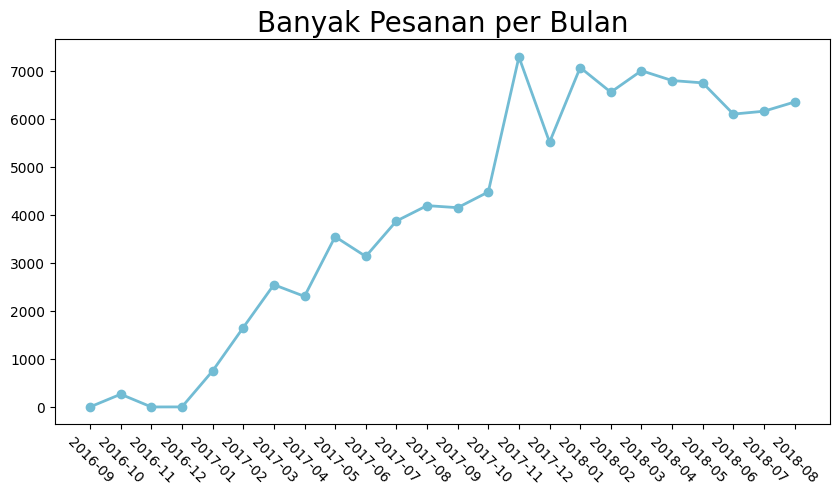

In [158]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker="o", linewidth=2,
         color="#72BCD4")
plt.title("Banyak Pesanan per Bulan", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation= -45)
plt.yticks(fontsize=10)
plt.show()

**Docs (152):**
Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan November 2017. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Desember 2017. Tentunya penurunan tersebut akan berdampak pada total revenue yang diperoleh perusahaan.

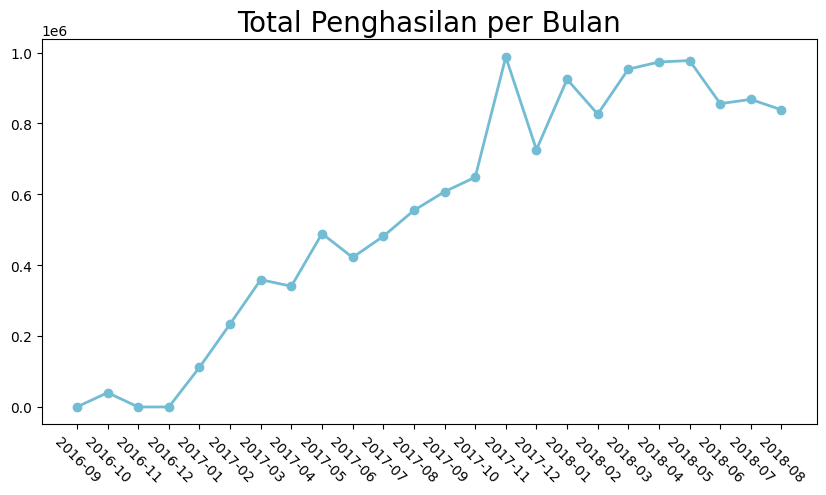

In [159]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker="o",
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Penghasilan per Bulan", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation= -45)
plt.yticks(fontsize=10)
plt.show()

**Docs (153):**
Penurunan jumlah order yang sangat signifikan berdampak terhadap penurunan revenue perusahaan. Normalnya, kita harus mencari tahu penyebab terjadinya penurunan tersebut dengan mempertimbangkan banyak hal, seperti keberadaan kompetitor, campaign, dll. Namun, untuk studi kasus ini, kita tidak memiliki cukup informasi terkait hal tersebut.

### Pertanyaan 2: Kategori produk apa yang paling banyak dan paling sedikit terjual?

**Docs (154):**
Mengetahui kategori produk yang paling banyak dan paling sedikit terjual

In [160]:
sum_order_items_df = products_dataset6.groupby("product_category_name_english").product_id.count().sort_values(
    ascending=False).reset_index()
sum_order_items_df.columns = ["product_category_name_english", "count"]
sum_order_items_df

,product_category_name_english,count
0,bed_bath_table,11122
1,health_beauty,9596
2,sports_leisure,8577
3,furniture_decor,8300
4,computers_accessories,7726
...,...,...
68,cds_dvds_musicals,14
69,la_cuisine,14
70,pc_gamer,8
71,fashion_childrens_clothes,7


**Docs (155):**
Memvisualisasikan dataset sum_order_items_df

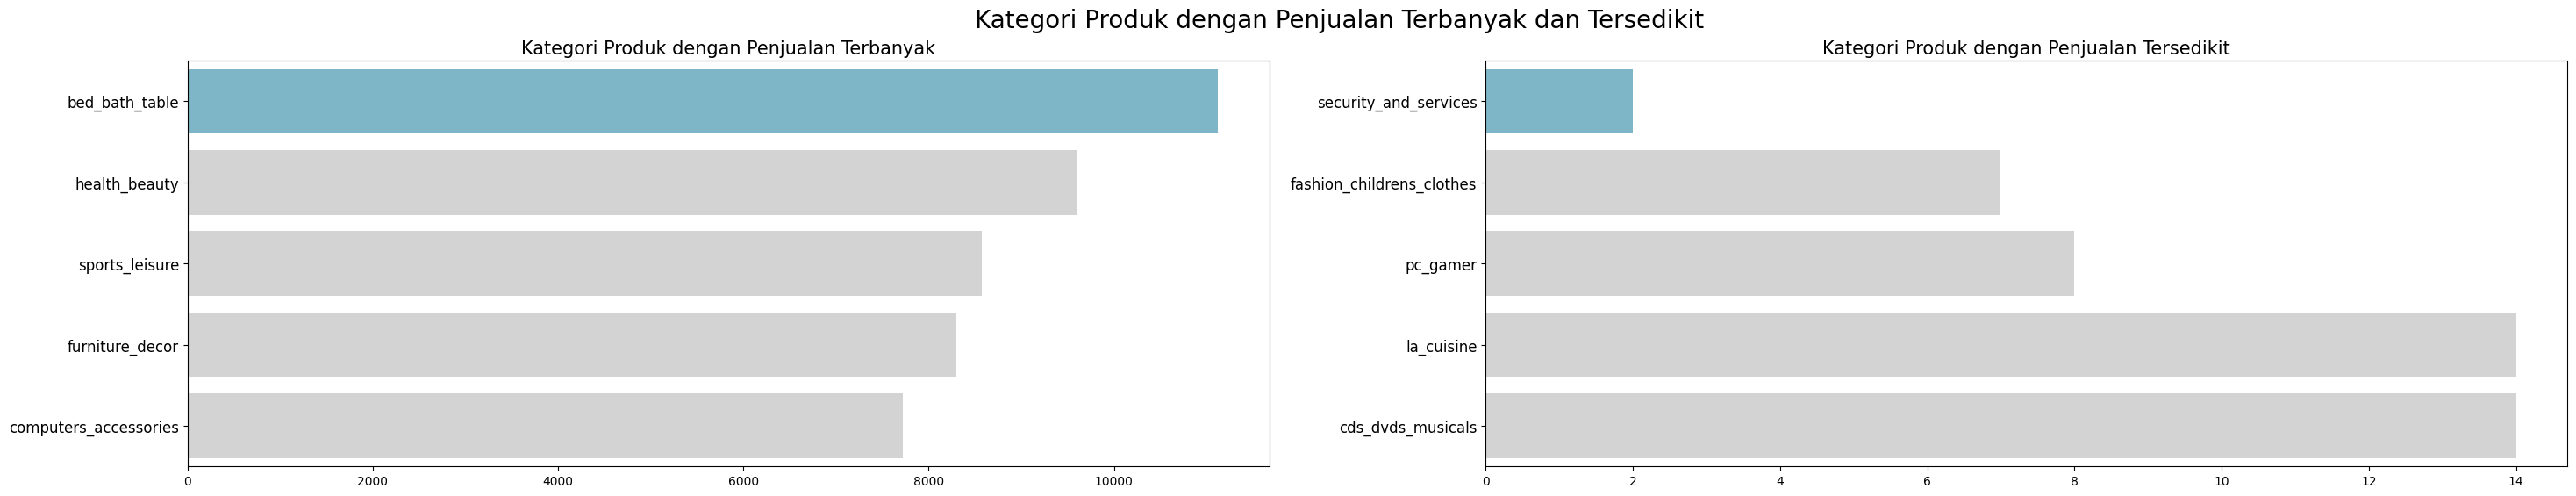

In [161]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="count", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kategori Produk dengan Penjualan Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis="y", labelsize=12)

sns.barplot(x="count", y="product_category_name_english", data=sum_order_items_df.sort_values(
    by="count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Kategori Produk dengan Penjualan Tersedikit", loc="center", fontsize=15)
ax[1].tick_params(axis="y", labelsize=12)

plt.suptitle("Kategori Produk dengan Penjualan Terbanyak dan Tersedikit", fontsize=20)
plt.show()

**Docs (156):**
Berdasarkan gambar di atas dapat diketahui bahwa kategori produk bed bath table merupakan kategori produk yang paling laris. Kontras dngan hal tersebut, kategori produk security and services merupakan produk yang paling sedikit terjual

### Pertanyaan 3: Bagaimana demografi pelanggan yang kita miliki?

**Docs (157):**
Mengidentifikasi jumlah pelanggan berdasarkan kode pos

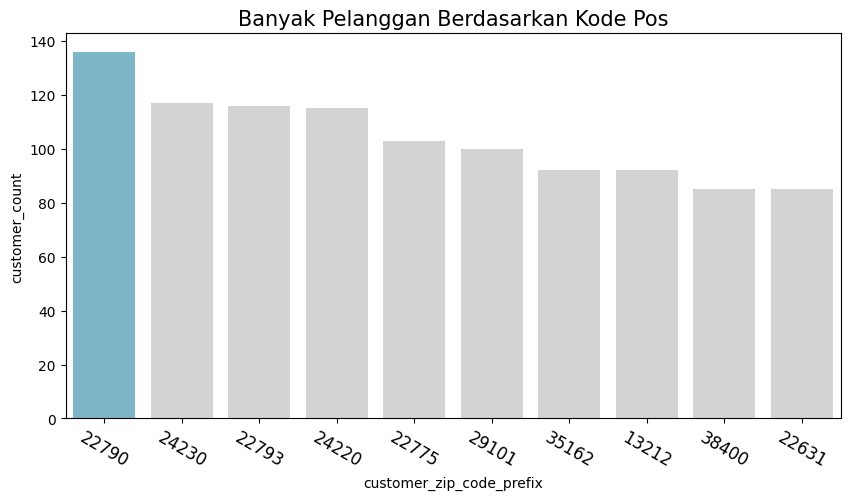

In [162]:
all_dataset["customer_zip_code_prefix"] = all_dataset["customer_zip_code_prefix"].astype(str)
byzipcode_df = all_dataset.groupby(by="customer_zip_code_prefix").customer_id.nunique().reset_index()
byzipcode_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",
          "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="customer_zip_code_prefix",
    data=byzipcode_df.sort_values(by="customer_count", ascending=False).head(10),
    # Hanya menampilkan 10 kode pos agar grafik mudah dibaca dengan mudah
    palette=colors
)
plt.title("Banyak Pelanggan Berdasarkan Kode Pos", loc="center", fontsize=15)
plt.ylabel("customer_count")
plt.xlabel("customer_zip_code_prefix")
plt.xticks(rotation= -30)
plt.tick_params(axis="x", labelsize=12)
plt.show()

**Docs (158):**
Berdasarkan data di atas diketahui bahwa pelanggan yang paling banyak melakukan transaksi merupakan pelanggan yang mempunyai kode pos 22790

**Docs (159):**
Mengidentifikasi ju0lah pelanggan berdasarkan kota

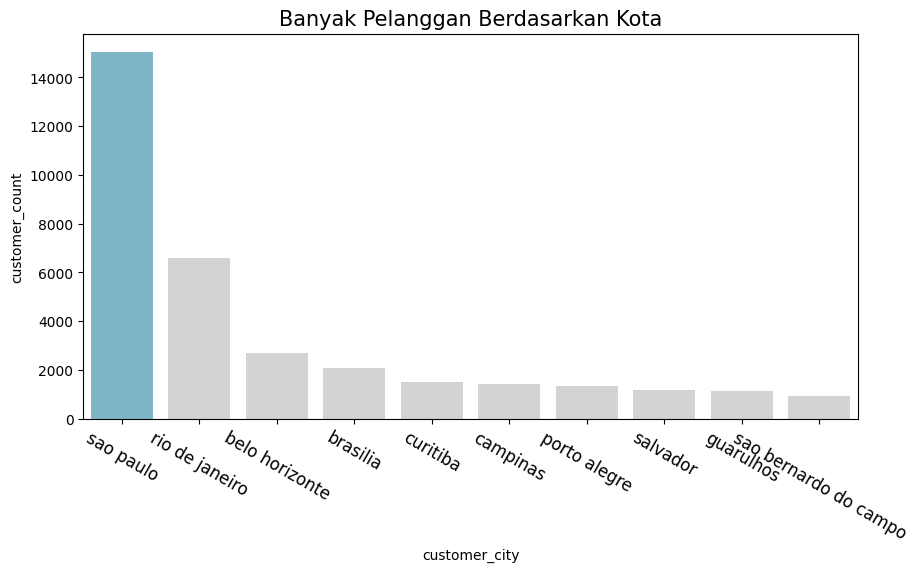

In [163]:
bycity_df = all_dataset.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",
          "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="customer_city",
    data=bycity_df.sort_values(by="customer_count", ascending=False).head(10),
    # Hanya menampilkan 10 kota agar grafik mudah dibaca dengan mudah
    palette=colors
)
plt.title("Banyak Pelanggan Berdasarkan Kota", loc="center", fontsize=15)
plt.ylabel("customer_count")
plt.xlabel("customer_city")
plt.xticks(rotation= -30)
plt.tick_params(axis="x", labelsize=12)
plt.show()

**Docs (160):**
Berdasarkan data di atas diketahui bahwa pelanggan yang paling banyak melakukan transaksi merupakan pelanggan yang berasal dari kota Sao Paulo

**Docs (161):**
Mengidentifikasi jumlah pelanggan berdasarkan negara bagian

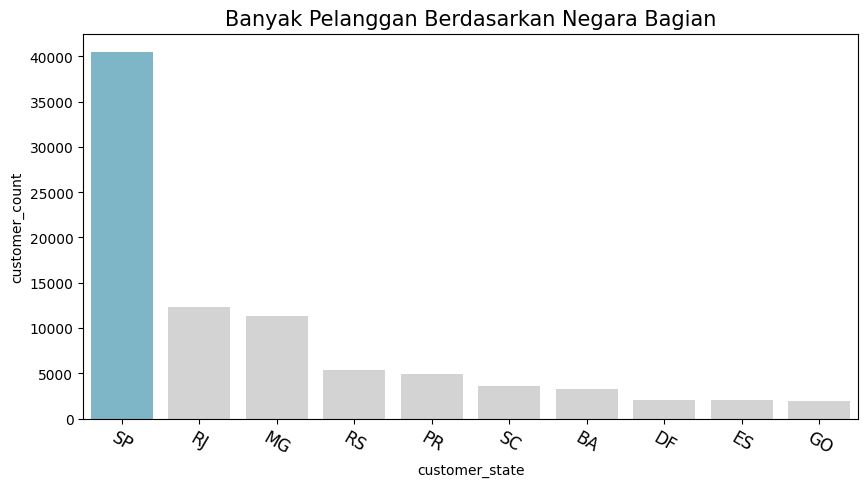

In [164]:
bystate_df = all_dataset.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",
          "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(10),
    # Hanya menampilkan 10 negara bagian agar grafik mudah dibaca dengan mudah
    palette=colors
)
plt.title("Banyak Pelanggan Berdasarkan Negara Bagian", loc="center", fontsize=15)
plt.ylabel("customer_count")
plt.xlabel("customer_state")
plt.xticks(rotation= -30)
plt.tick_params(axis="x", labelsize=12)
plt.show()

**Docs (162):**
Berdasarkan data di atas diketahui bahwa pelanggan yang paling banyak melakukan transaksi merupakan pelanggan yang berasal dari negara bagian SP

### Pertanyaan 4: Kapan terakhir pelanggan melakukan transaksi?

### Pertanyaan 5: Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?

### Pertanyaan 6: Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

**Docs (163):**
Untuk menjawab tiga pertanyaan analisis terakhir, kita bisa menggunakan teknik analisis lanjutan yang bernama RFM analysis. Sederhananya, RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.
- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [185]:
rfm_df = all_dataset.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum", # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_dataset["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,114
2,0000f46a3911fa3c0805444483337064,1,69.00,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,321
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,288


**Docs (164):**
Selanjutnya dapat diidentifikasi best customer berdasarkan parameter frequency, monetary, dan recency menggunakan kode berikut:


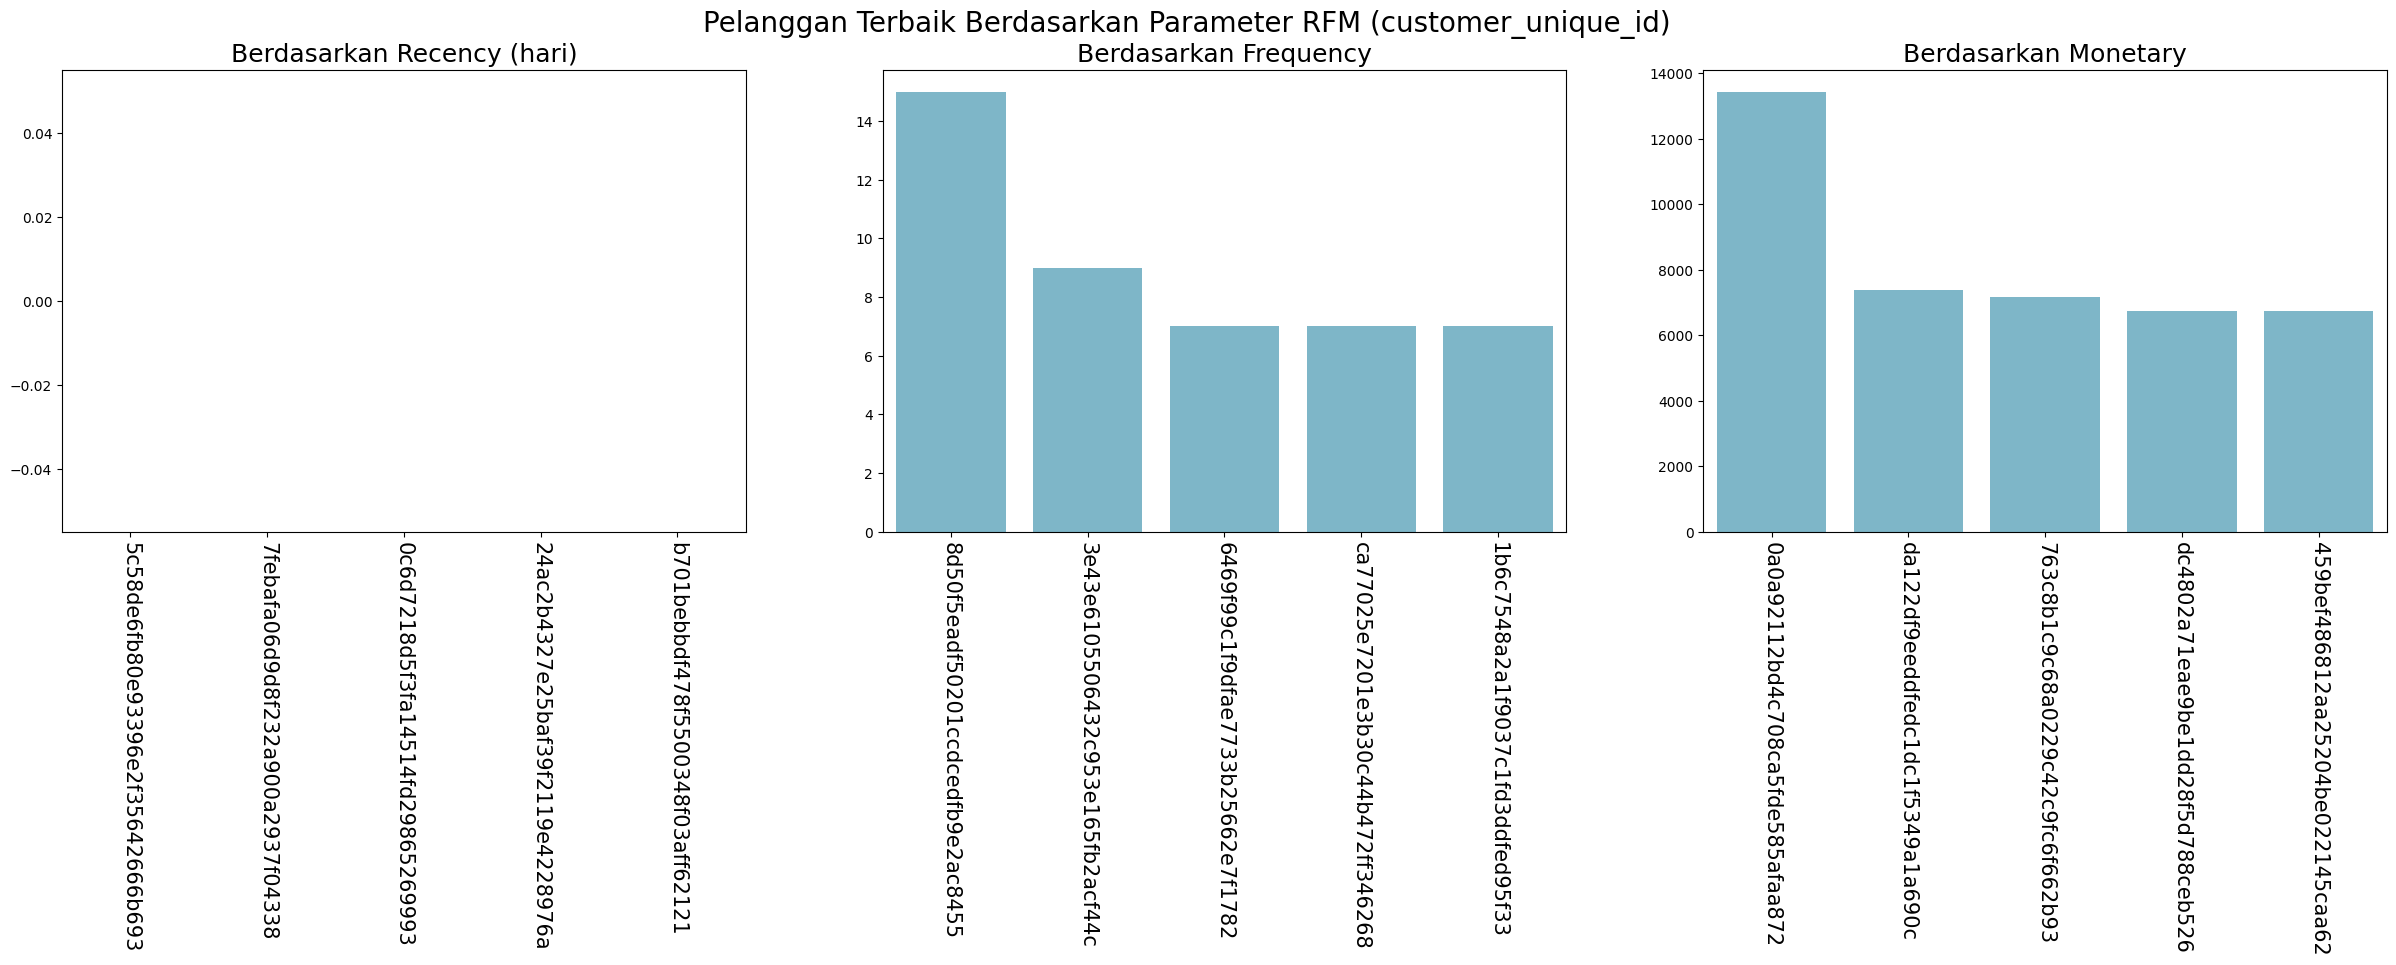

In [187]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency (hari)", loc="center", fontsize=18)
ax[0].tick_params(axis="x", labelsize=15, rotation=270)

sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis="x", labelsize=15, rotation=270)

sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis="x", labelsize=15, rotation=270)

plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RFM (customer_unique_id)", fontsize=20)
plt.show()

## Conclusion

**Docs (165):** Kesimpulan akhir

- Conclusion pertanyaan 1: Jumlah order terbanyak terjadi pada bulan November 2017. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Desember 2017. Tentunya penurunan tersebut akan berdampak pada total revenue yang diperoleh perusahaan. Penurunan jumlah order yang sangat signifikan berdampak terhadap penurunan revenue perusahaan. Normalnya, kita harus mencari tahu penyebab terjadinya penurunan tersebut dengan mempertimbangkan banyak hal, seperti keberadaan kompetitor, campaign, dll. Namun, untuk studi kasus ini, kita tidak memiliki cukup informasi terkait hal tersebut.
- Conclusion pertanyaan 2: Kategori produk bed bath table merupakan kategori produk yang paling laris. Kontras dngan hal tersebut, kategori produk security and services merupakan produk yang paling sedikit terjual
- Conclusion pertanyaan 3: Pelanggan yang paling banyak melakukan transaksi merupakan pelanggan yang mempunyai kode pos 22790. Pelanggan yang paling banyak melakukan transaksi merupakan pelanggan yang berasal dari kota Sao Paulo. Pelanggan yang paling banyak melakukan transaksi merupakan pelanggan yang berasal dari negara bagian SP
- Conclusion pertanyaan 4: Berdasarkan di atas diketahui bahwa ada pelanggan yang melaukan transaksi pada hari tersebut
- Conclusion pertanyaan 5: Pelanggan dengan customer_unique_id 8d50f5eadf50201ccdcedfb9e2ac8455 paling banyak melakukan pembelian sebanyak 15 kali dalam beberapa bulan terakhir
- Conclusion pertanyaan 6: Pelanggan dengan customer_unique_id 0a0a92112bd4c708ca5fde585afaa872 paling banyak menghabiskan uang dalam beberapa bulan terakhir

In [192]:
# !pip freeze > requirements.txt
# !pip list --format=freeze > requirements.txt